<a href="https://colab.research.google.com/github/Manish1176/Applied-Statistics/blob/main/ML_Regression_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a **regression supervised machine learning model** to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After **preprocessing** and **cleaning the data**, I split it into **training and test sets** and used the training data to train our machine learning model. I experimented with several different** model architectures and hyperparameter **settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including **mean absolute error, root mean squared error, and R-squared**. I found that our model was able to make highly accurate predictions, with an **R-squared value of 0.88** and a **mean absolute error of just 2.58.**

In addition to evaluating the performance of our model on the test data, I also conducted a series of** ablation studies** to understand the impact of individual features on the model's performance. **I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.**


# **GitHub Link -**

https://github.com/Manish1176/ML_Regression_BIKE_SHARING_DEMAND_PREDICTION

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


> My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# data visualization library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# datetime libraries for manupipulating date column
from datetime import datetime
import datetime as dt

# from sci-kit library
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# import diffrent metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the dataset
dataset = '/content/drive/MyDrive/SeoulBikeData.csv'
seoul_bike_df = pd.read_csv(dataset,encoding ='latin')

### Dataset First View

In [4]:
seoul_bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
seoul_bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
seoul_bike_df.shape

(8760, 14)

In [ ]:
print("Features of dataset:")
seoul_bike_df.columns.tolist()

Features of dataset:


['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

### Dataset Information

In [ ]:
print("Features of dataset:")
seoul_bike_df.info()

Features of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            

#### Duplicate Values

In [ ]:
seoul_bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
seoul_bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

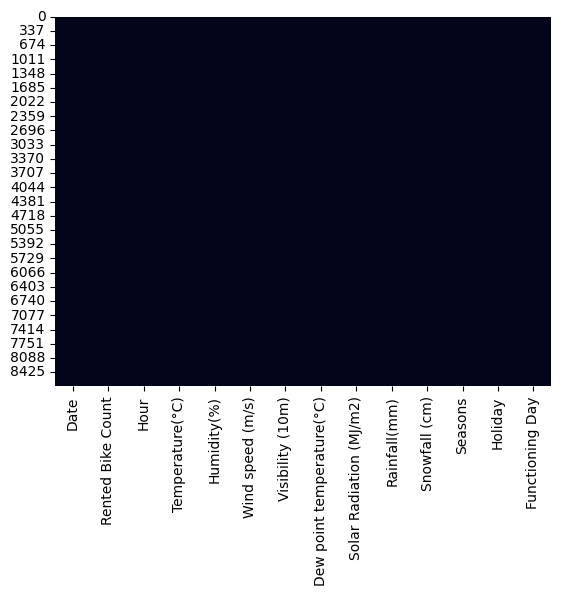

In [ ]:
# Visualizing the missing values
sns.heatmap(seoul_bike_df.isnull(), cbar = False)

<function matplotlib.pyplot.show(close=None, block=None)>

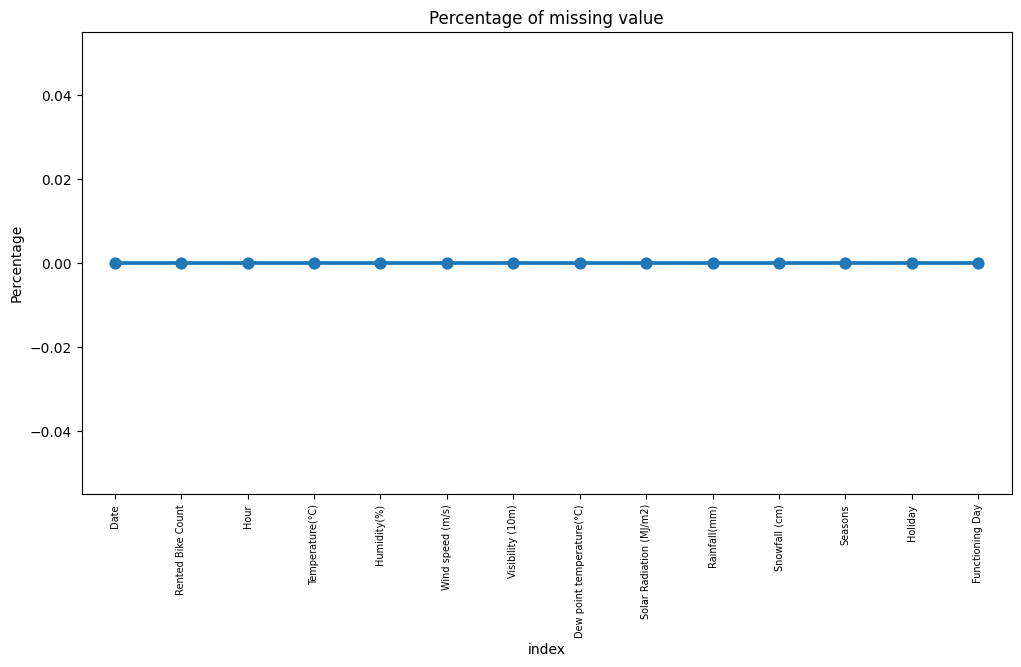

In [ ]:
missing_val = pd.DataFrame(seoul_bike_df.isnull().sum()*100/seoul_bike_df.shape[0]).reset_index()
plt.figure(figsize = (12,6))
xa = sns.pointplot(x = 'index', y = 0, data = missing_val)
plt.xticks(rotation = 90, fontsize = 7)
plt.title('Percentage of missing value')
plt.ylabel('Percentage')
plt.show


### What did you know about your dataset?

* There are 8760 observation and 14 features.
* In a day we have 24 hours and we have 365 days a year so 365 multiply by 24 equal to 8760, which represent the number of line in dataset.
* In dataset there are no null values.
* Dataset has all unique values i.e., there are no duplicate , which means data is free bias and duplicats.
* Data has some object data types, it should be datetime data types.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
seoul_bike_df.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [ ]:
# Dataset Columns
seoul_bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data*.

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*


### Check Unique Values for each variable.

In [ ]:
# check unique value for each variable
for i in seoul_bike_df.columns.tolist():
  print(f'no of unique values in {i} is {seoul_bike_df[i].nunique()}')

no of unique values in Date is 365
no of unique values in Rented Bike Count is 2166
no of unique values in Hour is 24
no of unique values in Temperature(°C) is 546
no of unique values in Humidity(%) is 90
no of unique values in Wind speed (m/s) is 65
no of unique values in Visibility (10m) is 1789
no of unique values in Dew point temperature(°C) is 556
no of unique values in Solar Radiation (MJ/m2) is 345
no of unique values in Rainfall(mm) is 61
no of unique values in Snowfall (cm) is 51
no of unique values in Seasons is 4
no of unique values in Holiday is 2
no of unique values in Functioning Day is 2


## 3. ***Data Wrangling***

#### **3.1 Duplicate Values**

In [ ]:
# Checking Duplicate Values
value = len(seoul_bike_df[seoul_bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#### **3.2 Change Column Name**

In [ ]:
#Rename the complex columns name
seoul_bike_df = seoul_bike_df.rename(columns = {'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

#### **3.3 Seperate Date Column**

* **Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.**

In [ ]:
# Changing the "Date" column into three "year","month","day" column
seoul_bike_df['Date'] = seoul_bike_df['Date'].str.replace('-', '/')
seoul_bike_df['Date'] = seoul_bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [ ]:
seoul_bike_df['year'] = seoul_bike_df['Date'].dt.year
seoul_bike_df['Month'] = seoul_bike_df['Date'].dt.month
seoul_bike_df['day'] = seoul_bike_df['Date'].dt.day_name()

#### **3.4 Create New Column**

* **Creating a new column of "weekdays_weekend".**

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
seoul_bike_df['Weekdays_Weekend'] = seoul_bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
seoul_bike_df['Weekdays_Weekend'].value_counts()

0    6264
1    2496
Name: Weekdays_Weekend, dtype: int64

#### **3.5 Delete Unwanted Column**

* ***We convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [ ]:
seoul_bike_df = seoul_bike_df.drop(columns=['Date','day','year'],axis=1)

#### **3.6 Change Datatype of Column**

* **As "Hour", "Month", "Weekdays_Weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.**

In [ ]:
# Change the int64 column into catagory column
cols=['Hour','Month','Weekdays_Weekend']
for col in cols:
  seoul_bike_df[col] = seoul_bike_df[col].astype('category')

In [ ]:
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  Weekdays_Weekend       8760 non-null   c

In [ ]:
seoul_bike_df.columns.to_list()

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning_Day',
 'Month',
 'Weekdays_Weekend']

### **What all manipulations have you done and insights you found?**

* Update columns datatye and fix in right way.
* Create a new column month and delete date column which is not required.
* Rename the columns as per need.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Analysis of Categorical variable**

#### **Feature 1 - Month**

[Text(0.5, 1.0, 'Count of Rented Bike according the Month')]

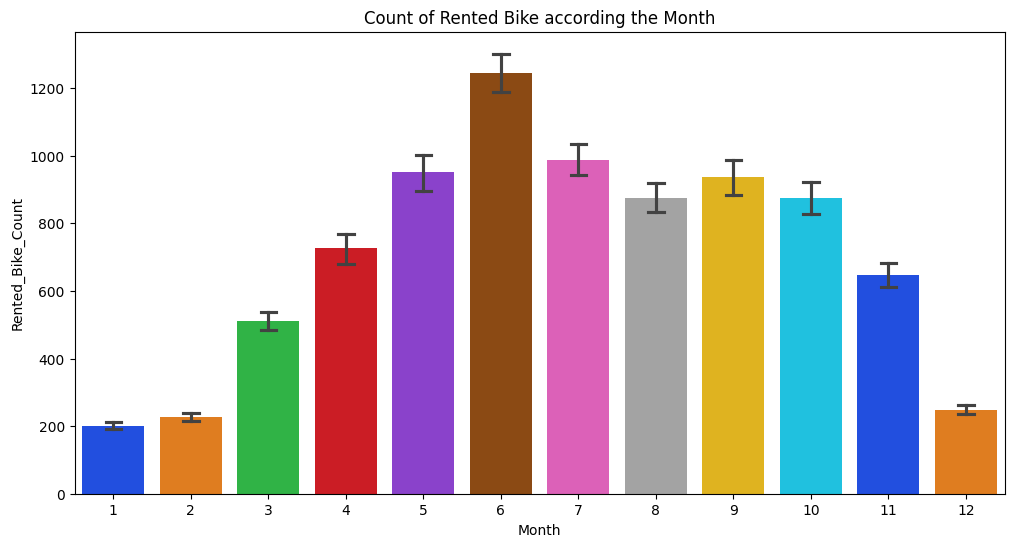

In [ ]:
# count the rented bike according the month
fig,ax = plt.subplots(figsize = (12,6))
sns.barplot(data = seoul_bike_df, x='Month', y = 'Rented_Bike_Count', ax = ax, capsize = .2, palette = 'bright')
ax.set(title = 'Count of Rented Bike according the Month')

* **From the above bar plot we can clearly say that, from the month 5 to 10
 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.**

#### **Feature 2 - Hour**

[Text(0.5, 1.0, 'Count of Rented Bike according the Hour')]

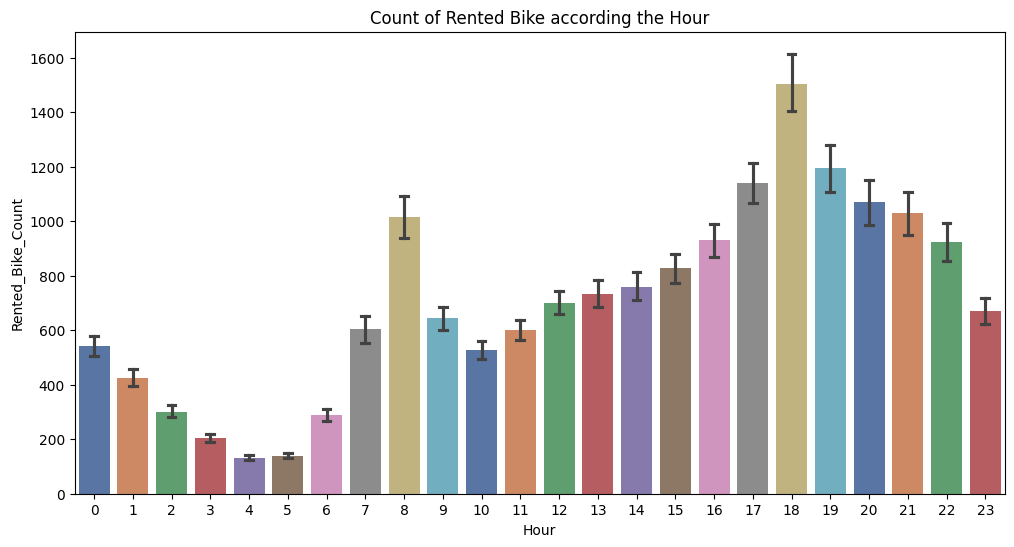

In [ ]:
# Count of rented bikes according to hours
fig,ax = plt.subplots(figsize = (12,6))
sns.barplot(data = seoul_bike_df, x = 'Hour', y = 'Rented_Bike_Count', ax = ax, capsize=.2, palette = 'deep')
ax.set(title = 'Count of Rented Bike according the Hour')

* **In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.**

* **Generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**

#### **Feature 3 - Weekdays_Weekend**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday')]

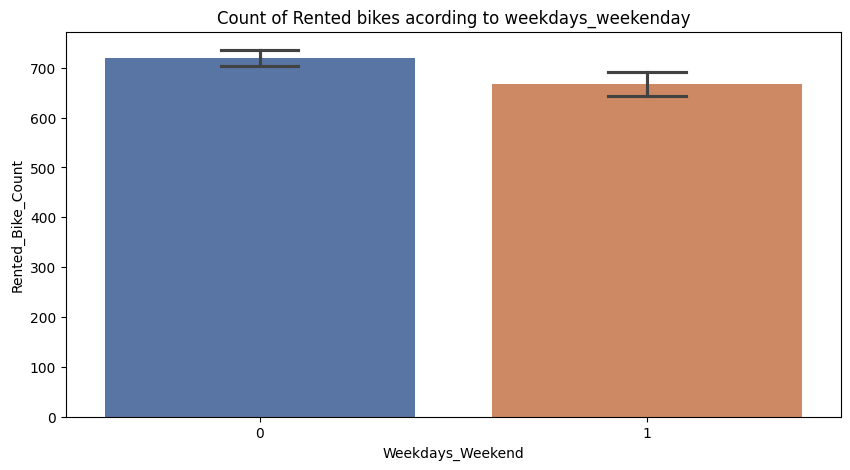

In [ ]:
# Count of rented bikes according to hours
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data = seoul_bike_df, x = 'Weekdays_Weekend', y = 'Rented_Bike_Count', ax = ax,capsize = .2, palette = 'deep')
ax.set(title = 'Count of Rented bikes acording to weekdays_weekenday')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday')]

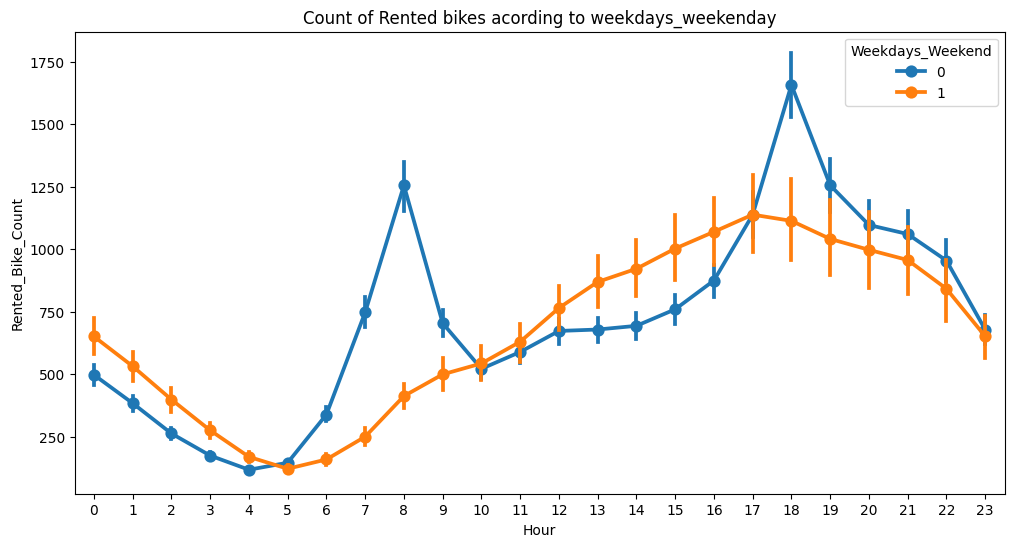

In [ ]:
# Count of rented bikes according to hours
fig,ax = plt.subplots(figsize = (12,6))
sns.pointplot(data = seoul_bike_df, x = 'Hour', y = 'Rented_Bike_Count', hue = 'Weekdays_Weekend',  ax = ax)
ax.set(title = 'Count of Rented bikes acording to weekdays_weekenday')

* **In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.**

* **Generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**

#### **Feature 4 - Functioning Day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

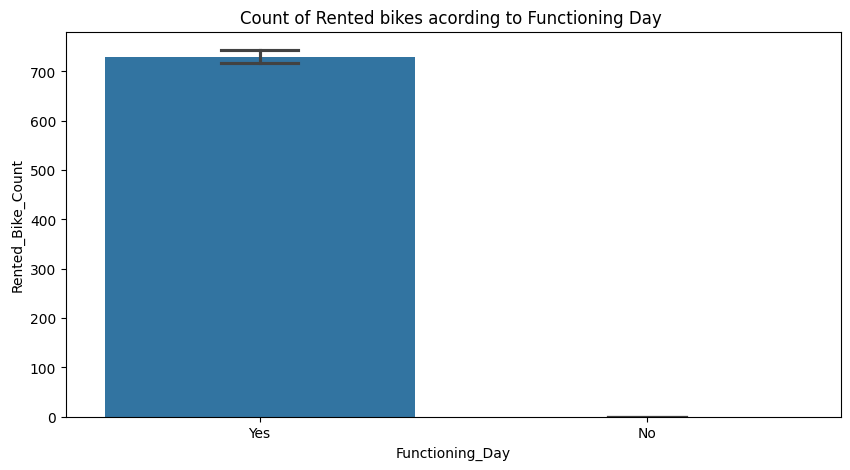

In [ ]:
# Count of rented bike according to functioning day
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data = seoul_bike_df, x = 'Functioning_Day', y = 'Rented_Bike_Count', ax = ax,capsize = .2)
ax.set(title = 'Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

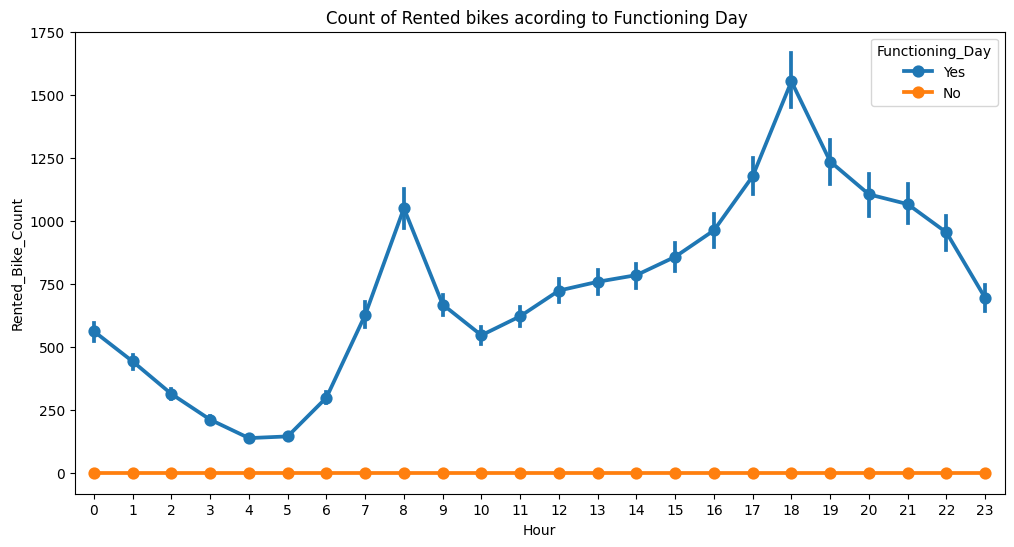

In [ ]:
# Count of rented bike according to functioning day
fig,ax = plt.subplots(figsize = (12,6))
sns.pointplot(data = seoul_bike_df, x = 'Hour', y = 'Rented_Bike_Count', hue ='Functioning_Day', ax = ax)
ax.set(title = 'Count of Rented bikes acording to Functioning Day ')

* **In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,
Peoples don't use reneted bikes in no functioning day.**

#### **Feature 5 - Seasons**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')]

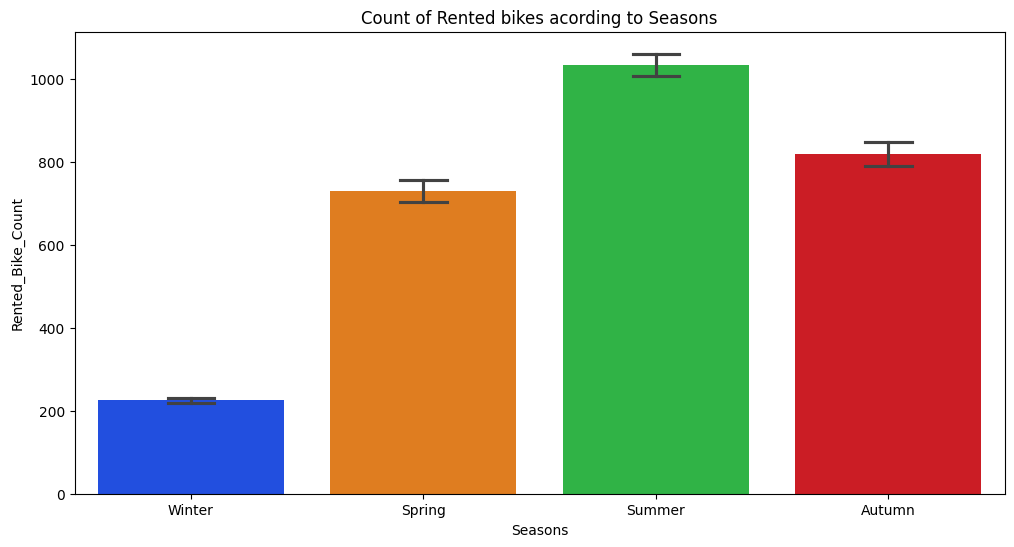

In [ ]:
# Count of rented bike according to functioning day
fig,ax = plt.subplots(figsize = (12,6))
sns.barplot(data = seoul_bike_df, x = 'Seasons', y = 'Rented_Bike_Count', ax = ax,capsize = .2, palette = 'bright')
ax.set(title = 'Count of Rented bikes acording to Seasons')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')]

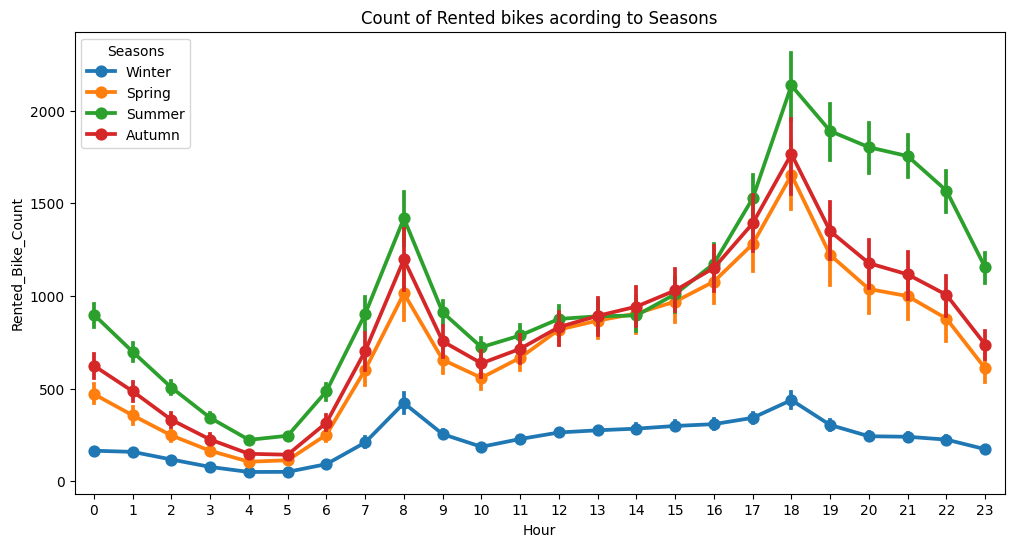

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data = seoul_bike_df, x = 'Hour', y = 'Rented_Bike_Count', hue = 'Seasons', ax = ax)
ax.set(title = 'Count of Rented bikes acording to Seasons')

* ***In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am - 9am and 5pm - 7pm.***
* ***In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.***

#### **Feature 6 - Holiday**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

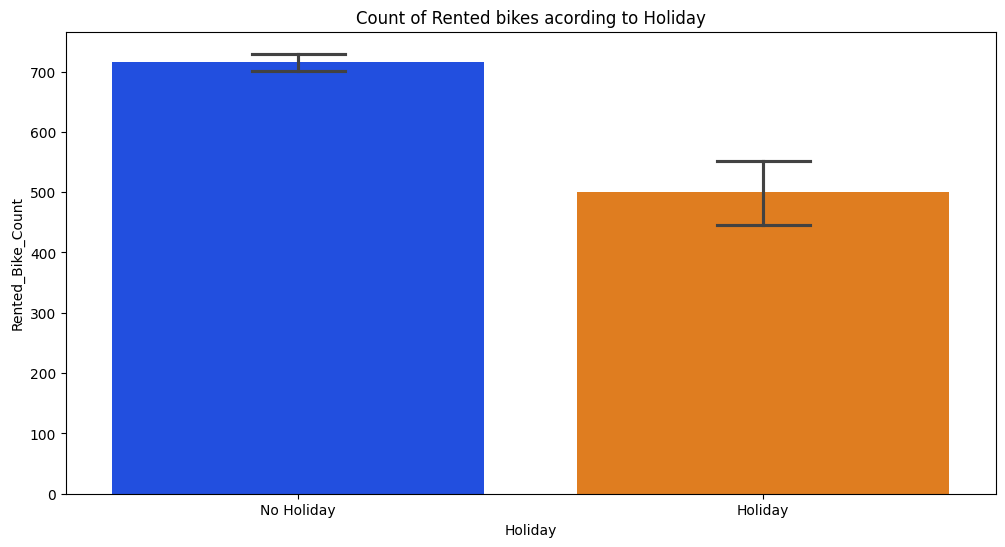

In [ ]:
# Count of rented bike according to Holidays
fig,ax = plt.subplots(figsize = (12,6))
sns.barplot(data = seoul_bike_df, x = 'Holiday', y = 'Rented_Bike_Count', ax = ax,capsize = .2, palette = 'bright')
ax.set(title = 'Count of Rented bikes acording to Holiday')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

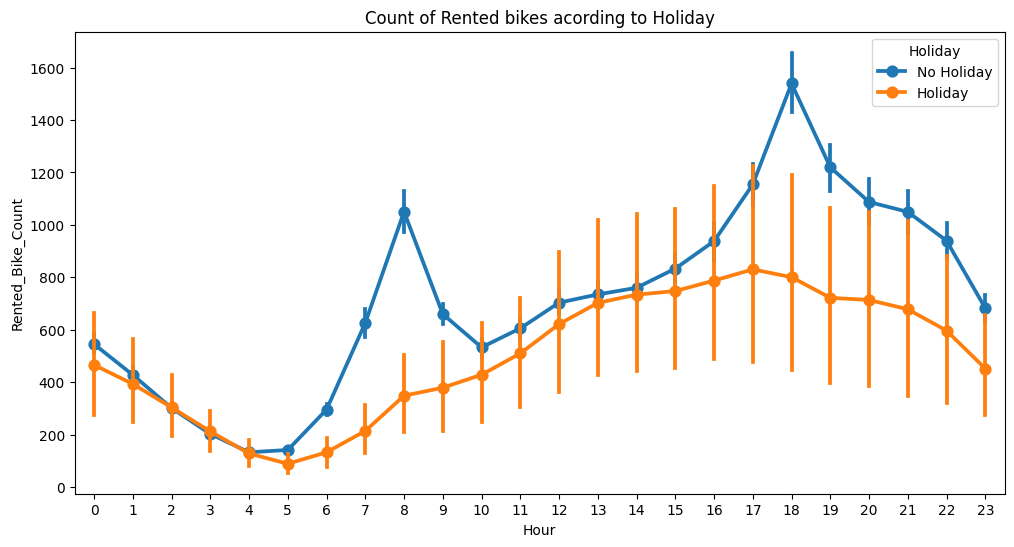

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data = seoul_bike_df, x = 'Hour', y = 'Rented_Bike_Count', hue = 'Holiday', ax = ax)
ax.set(title = 'Count of Rented bikes acording to Holiday')

* **In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,**
* **In holiday, people uses the rented bike from 2pm - 8pm.**

### **Analysis of Numerical variable**

#### **Skewness of our numerical features**

In [ ]:
numerical_features = seoul_bike_df.select_dtypes(exclude = ['object', 'category'])
numerical_features

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                   254         -5.2        37         2.2        2000   
1                   204         -5.5        38         0.8        2000   
2                   173         -6.0        39         1.0        2000   
3                   107         -6.2        40         0.9        2000   
4                    78         -6.0        36         2.3        2000   
...                 ...          ...       ...         ...         ...   
8755               1003          4.2        34         2.6        1894   
8756                764          3.4        37         2.3        2000   
8757                694          2.6        39         0.3        1968   
8758                712          2.1        41         1.0        1859   
8759                584          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

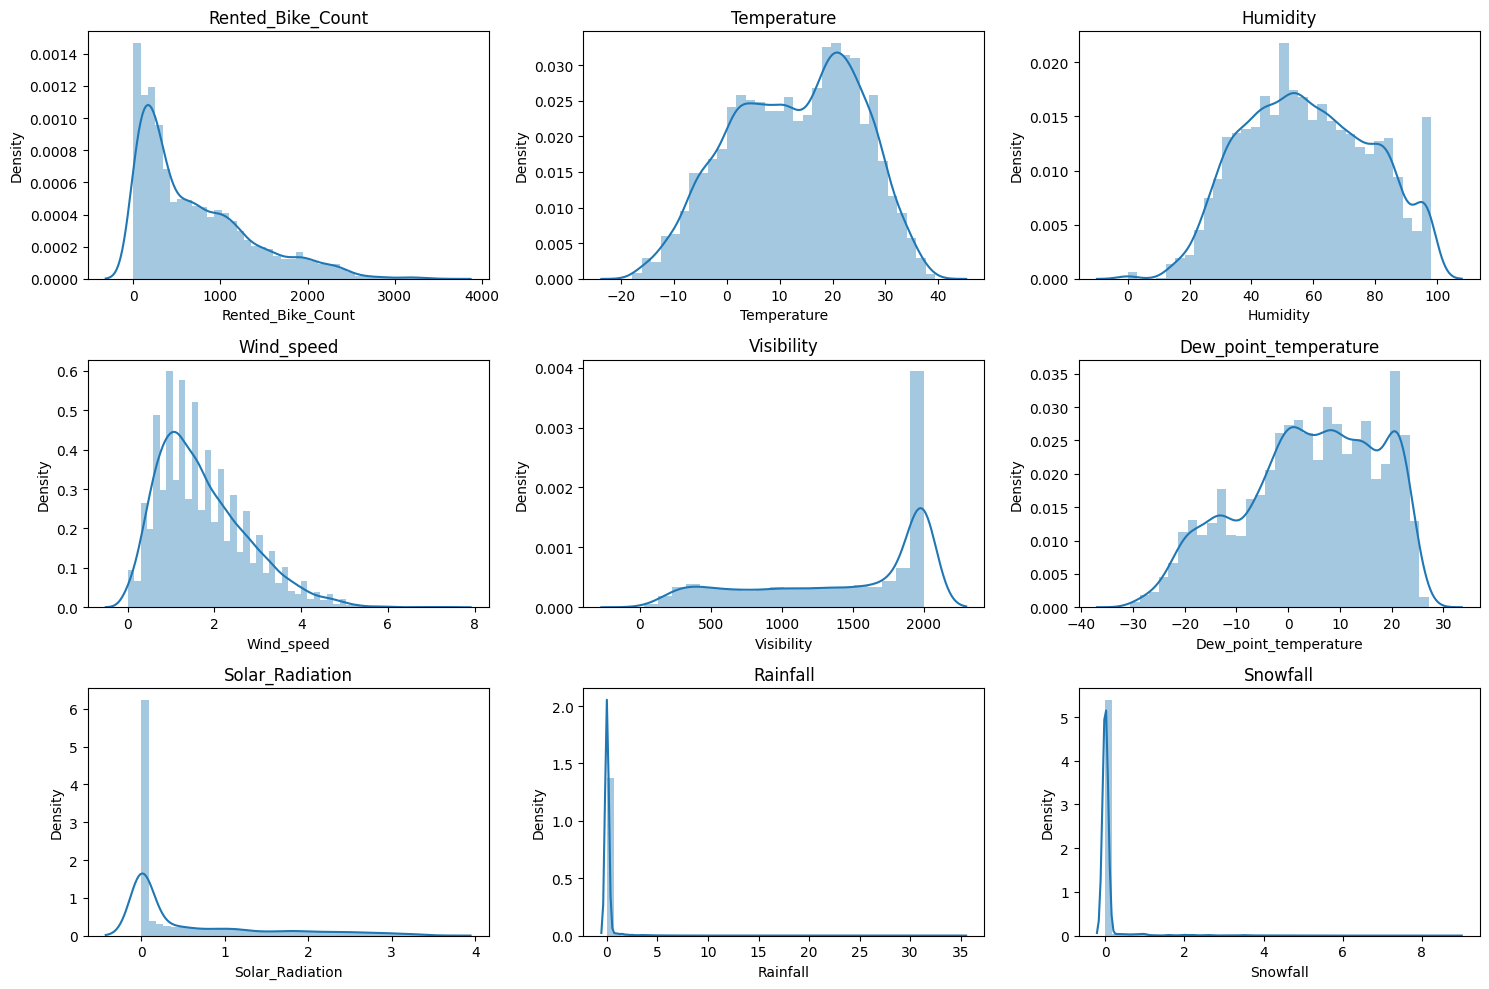

In [ ]:
# Plot skewnss of feature
n = 1
plt.figure(figsize = (15,10))
for i in numerical_features.columns:
  plt.subplot(3, 3, n)
  n = n+1
  sns.distplot(seoul_bike_df[i])
  plt.title(i)
  plt.tight_layout()

* #### **Right skewed columns are**
Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

* #### **Left skewed columns are**
Visibility (10m),
Dew point temperature(°C)

### **Lets try to find how is the relation of numerical features with our dependent variable**

**1 - Temprature vs Rented_Bike_Count**

<Axes: xlabel='Temperature'>

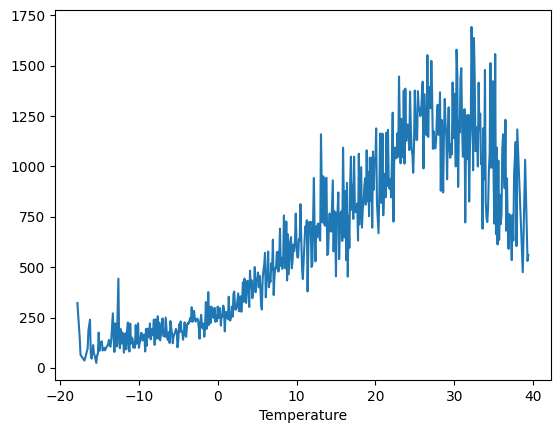

In [ ]:
seoul_bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* **From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average**

**2 - Dew_point_temrature vs Rented_Bike_Count**

<Axes: xlabel='Dew_point_temperature'>

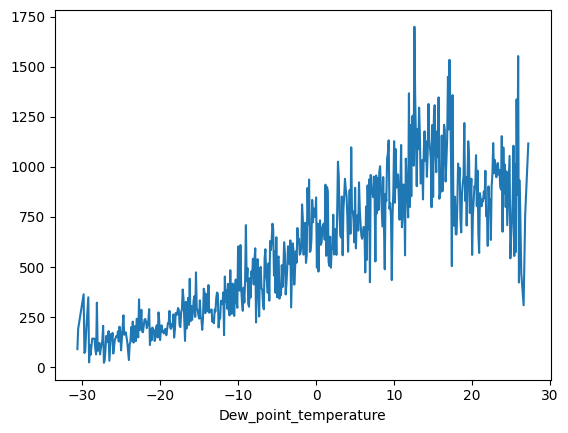

In [ ]:
seoul_bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

* **From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.**

**3 - Solar_radiation vs Rented_Bike_Count**

<Axes: xlabel='Solar_Radiation'>

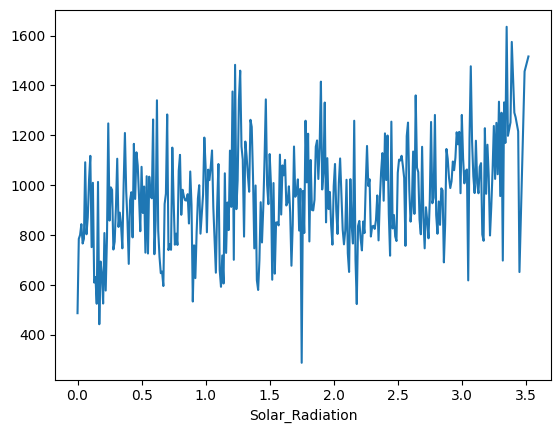

In [ ]:
seoul_bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

* **From the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000.**

**4 - Snowfall vs Rented_Bike_Count**

<Axes: xlabel='Snowfall'>

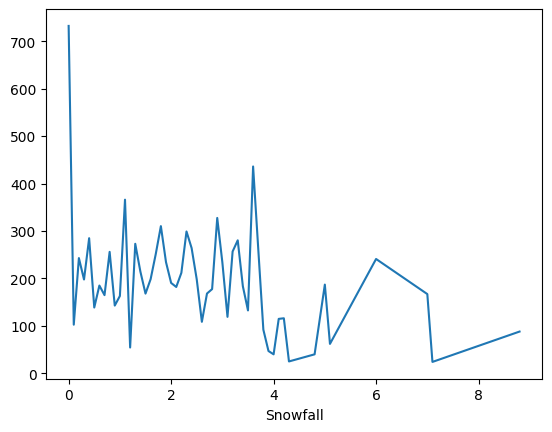

In [ ]:
seoul_bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

**We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower.**

**5 - Rainfall vs Rented_Bike_Count**

<Axes: xlabel='Rainfall'>

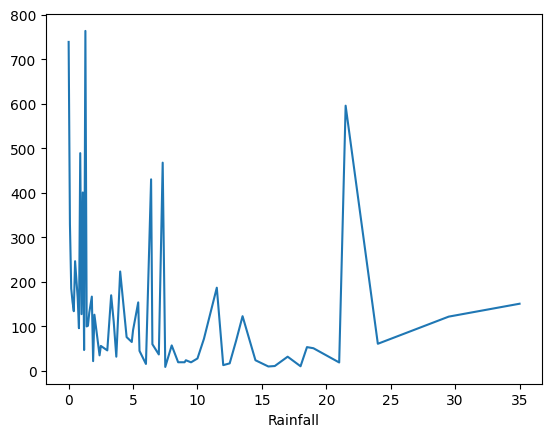

In [ ]:
seoul_bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

**We can see from the above plot that, even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes.**

**6 - Wind_speed vs Rented_Bike_Count**

<Axes: xlabel='Wind_speed'>

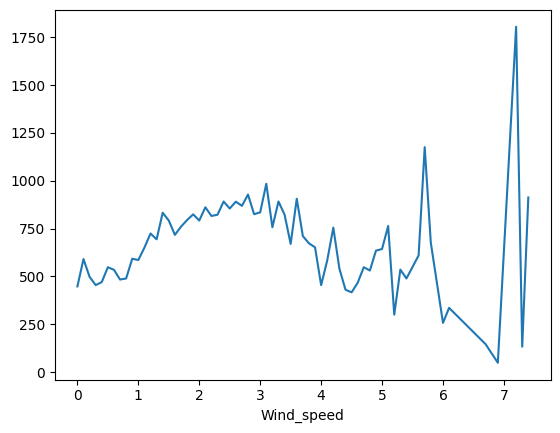

In [ ]:
seoul_bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

**We can see from the above plot that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy.**

### **Regression Plot**

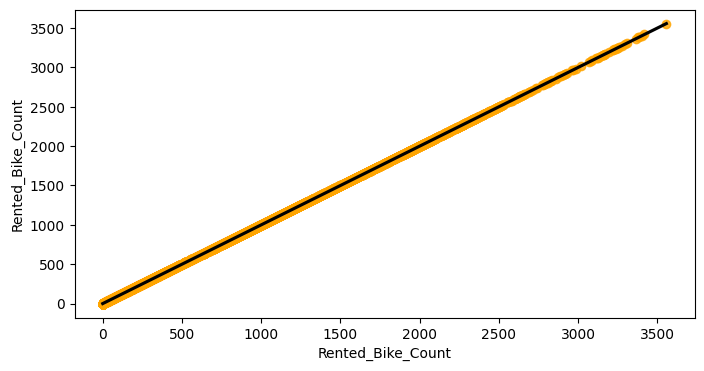

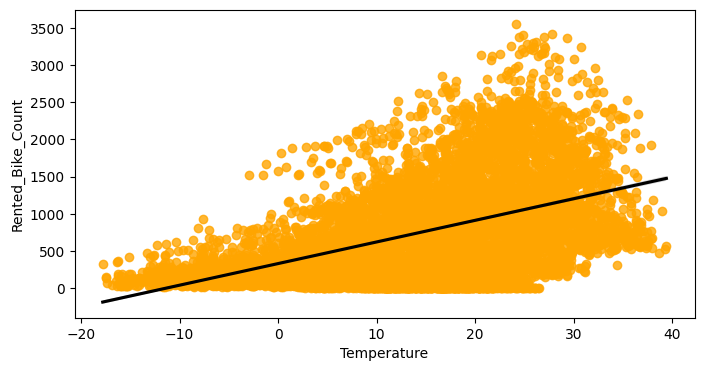

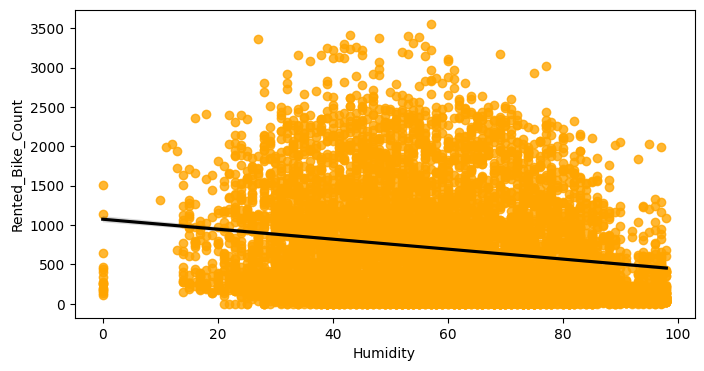

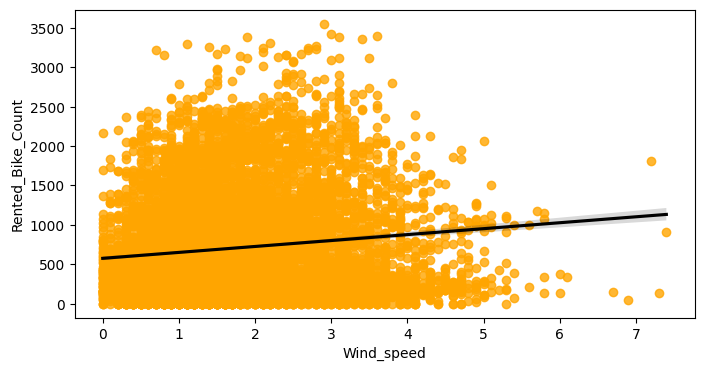

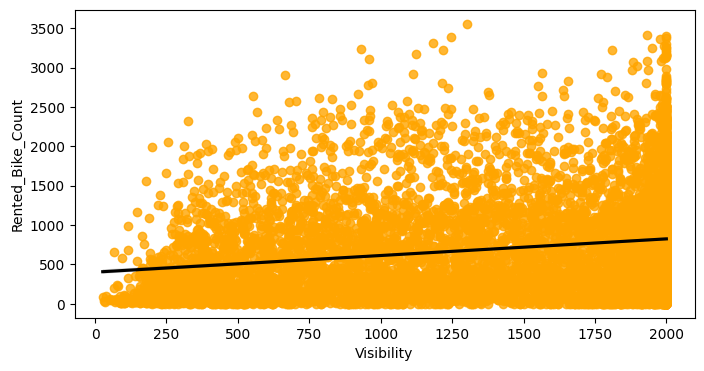

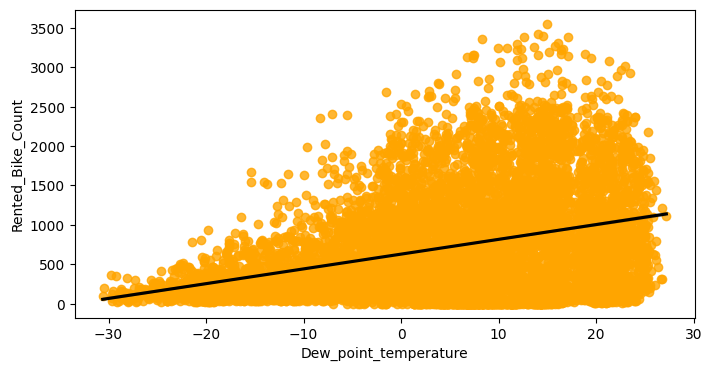

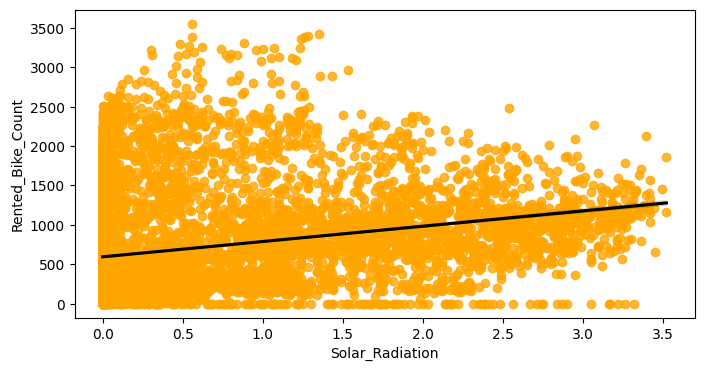

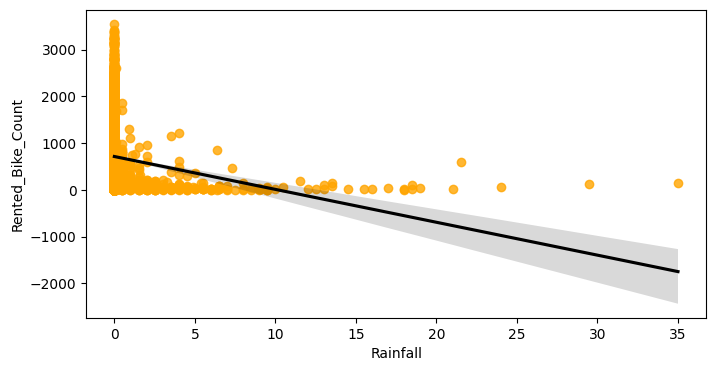

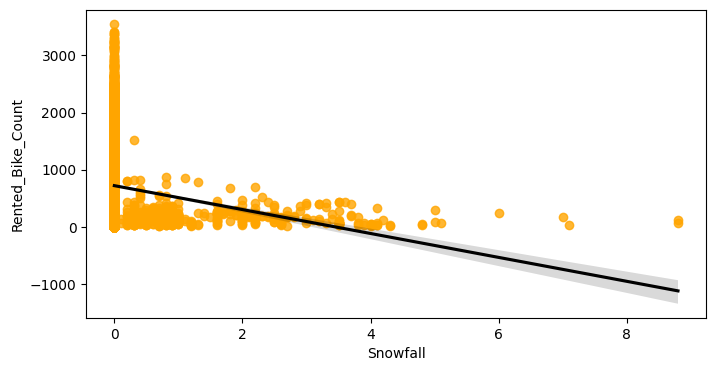

In [ ]:
# Check relation of rented bike count vs all
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax = plt.subplots(figsize = (8,4))
  sns.regplot(x = seoul_bike_df[col], y = seoul_bike_df['Rented_Bike_Count'], scatter_kws = {"color": 'orange'}, line_kws = {"color": "black"})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed', 'Visibility', 'Dew_point_temperature' 'Solar_Radiation' are positively relation to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

### **Normalise Rented_Bike_Count column data**

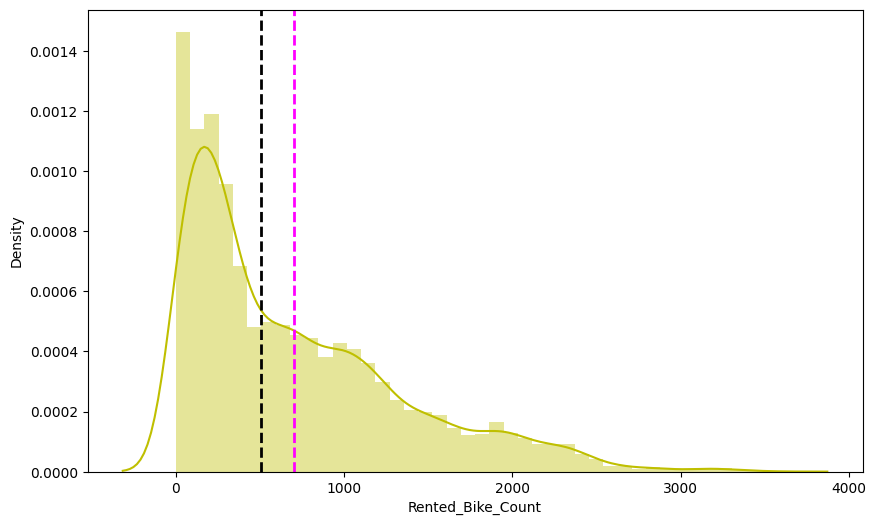

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize = (10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax = sns.distplot(seoul_bike_df['Rented_Bike_Count'],hist = True ,color = "y")
ax.axvline(seoul_bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle = 'dashed', linewidth = 2)
ax.axvline(seoul_bike_df['Rented_Bike_Count'].median(), color = 'black', linestyle = 'dashed', linewidth = 2)
plt.show()

* **The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**

**Finding Outliers and treatments**

<Axes: xlabel='Rented_Bike_Count', ylabel='Rented_Bike_Count'>

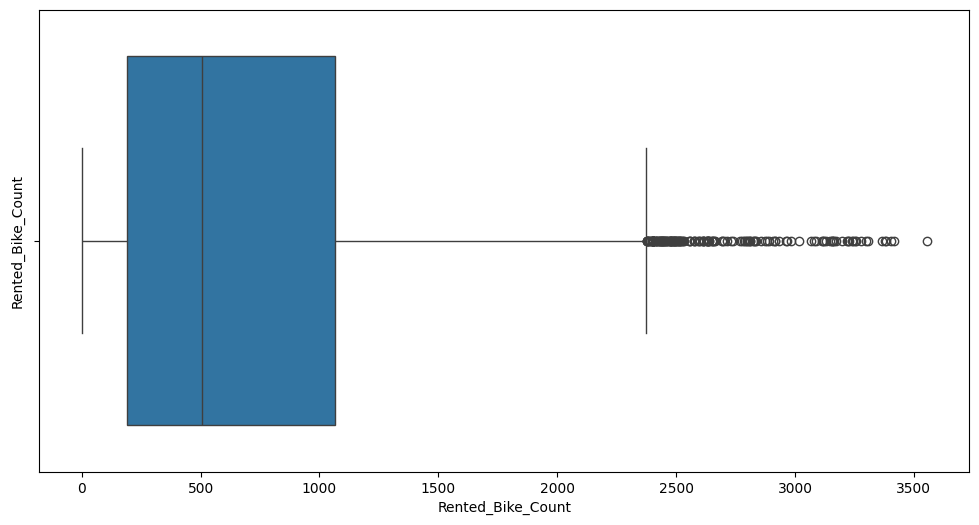

In [ ]:
plt.figure(figsize = (12,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x = seoul_bike_df['Rented_Bike_Count'])

In [ ]:
# outliers treatments
seoul_bike_df.loc[seoul_bike_df['Rainfall']>=4,'Rainfall']= 4
seoul_bike_df.loc[seoul_bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
seoul_bike_df.loc[seoul_bike_df['Snowfall']>2,'Snowfall']= 2
seoul_bike_df.loc[seoul_bike_df['Wind_speed']>=4,'Wind_speed']= 4

**we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.**

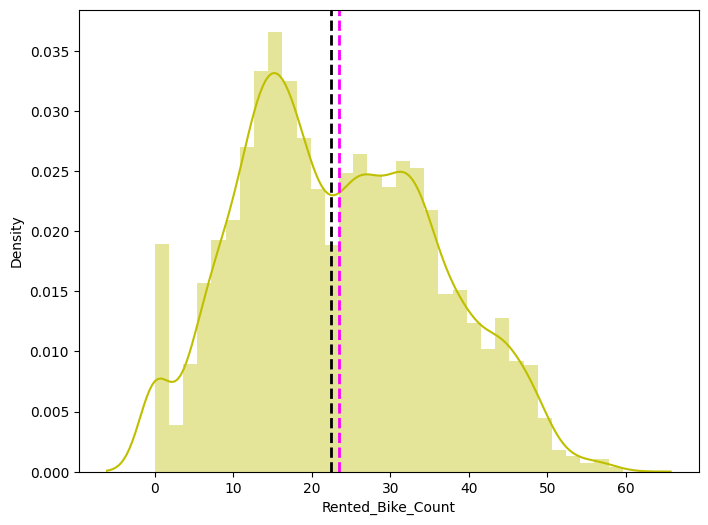

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize = (8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(seoul_bike_df['Rented_Bike_Count']), color = "y")
ax.axvline(np.sqrt(seoul_bike_df['Rented_Bike_Count']).mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax.axvline(np.sqrt(seoul_bike_df['Rented_Bike_Count']).median(), color = 'black', linestyle = 'dashed', linewidth = 2)

plt.show()

* **Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**

**After removal Outliers**

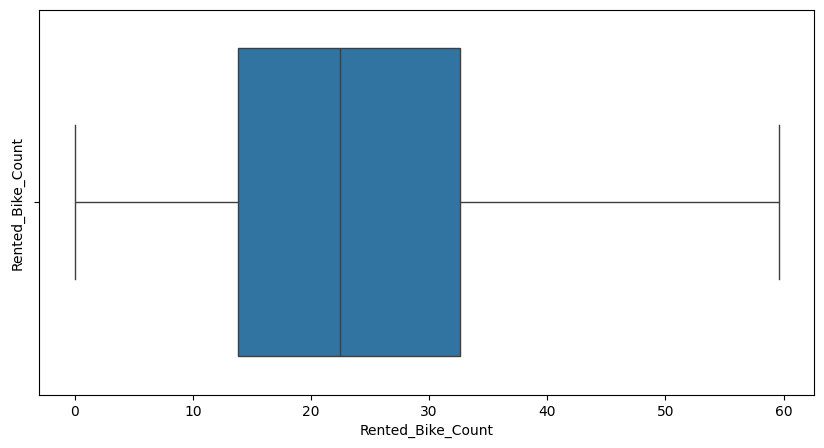

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize = (10,5))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x = np.sqrt(seoul_bike_df['Rented_Bike_Count']))
plt.show()

* **After applying Square root to the Rented Bike Count column, we find that there is no outliers present.**

In [ ]:
seoul_bike_df.corr()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.131549   
Temperature                     0.538558     1.000000  0.159371   -0.031368   
Humidity                       -0.199780     0.159371  1.000000   -0.341432   
Wind_speed                      0.131549    -0.031368 -0.341432    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.173683   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.174233   
Solar_Radiation                 0.265658     0.350679 -0.467236    0.342995   
Rainfall                       -0.174224     0.061274  0.331631   -0.038813   
Snowfall                       -0.160917    -0.263134  0.087086    0.008140   

                       Visibility  Dew_point_temperature  Solar_Radiation  \
Rented_Bike_Count        0.199280               0.379788         0.265658   
Temperature              0.034794               0.912798         0.350679   
Humidity                -0.543090               0.536894        -0.467236   
Wind_speed               0.173683              -0.174233         0.342995   
Visibility               1.000000              -0.176630         0.151105   
Dew_point_temperature   -0.176630               1.000000         0.090541   
Solar_Radiation          0.151105               0.090541         1.000000   
Rainfall                -0.238378               0.168386        -0.105920   
Snowfall                -0.109306              -0.195743        -0.080470   

                       Rainfall  Snowfall  
Rented_Bike_Count     -0.174224 -0.160917  
Temperature            0.061274 -0.263134  
Humidity               0.331631  0.087086  
Wind_speed            -0.038813  0.008140  
Visibility            -0.238378 -0.109306  
Dew_point_temperature  0.168386 -0.195743  
Solar_Radiation       -0.105920 -0.080470  
Rainfall               1.000000 -0.002297  
Snowfall              -0.002297  1.000000

### **Checking of Correlation between variables**

**Checking in OLS Model**

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = seoul_bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = seoul_bike_df['Rented_Bike_Count']
seoul_bike_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day Month Weekdays_Weekend  
0  No Holiday             Yes    12                0  
1  No Holiday             Yes    12                0  
2  No Holiday             Yes    12                0  
3  No Holiday             Yes    12                0  
4  No Holiday             Yes    12                0

In [ ]:
#add a constant column
X = sm.add_constant(X)
X

const  Temperature  Humidity  Wind_speed  Visibility  \
0       1.0         -5.2        37         2.2        2000   
1       1.0         -5.5        38         0.8        2000   
2       1.0         -6.0        39         1.0        2000   
3       1.0         -6.2        40         0.9        2000   
4       1.0         -6.0        36         2.3        2000   
...     ...          ...       ...         ...         ...   
8755    1.0          4.2        34         2.6        1894   
8756    1.0          3.4        37         2.3        2000   
8757    1.0          2.6        39         0.3        1968   
8758    1.0          2.1        41         1.0        1859   
8759    1.0          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

In [ ]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:51:11   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is  explained by the model.**
*  **For F statistic , P value is less than 0.05 for 5% levelof significance.**
*  **P value of dew point temp and visibility are very high and they are not significant.**

*  **Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.**
*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**   
*  **Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**

In [ ]:
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.031368    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.341432   -0.543090   
Wind_speed               NaN    -0.031368 -0.341432    1.000000    0.173683   
Visibility               NaN     0.034794 -0.543090    0.173683    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.174233   -0.176630   
Solar_Radiation          NaN     0.350679 -0.467236    0.342995    0.151105   
Rainfall                 NaN     0.061274  0.331631   -0.038813   -0.238378   
Snowfall                 NaN    -0.263134  0.087086    0.008140   -0.109306   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.350679  0.061274   
Humidity                            0.536894        -0.467236  0.331631   
Wind_speed                         -0.174233         0.342995 -0.038813   
Visibility                         -0.176630         0.151105 -0.238378   
Dew_point_temperature               1.000000         0.090541  0.168386   
Solar_Radiation                     0.090541         1.000000 -0.105920   
Rainfall                            0.168386        -0.105920  1.000000   
Snowfall                           -0.195743        -0.080470 -0.002297   

                       Snowfall  
const                       NaN  
Temperature           -0.263134  
Humidity               0.087086  
Wind_speed             0.008140  
Visibility            -0.109306  
Dew_point_temperature -0.195743  
Solar_Radiation       -0.080470  
Rainfall              -0.002297  
Snowfall               1.000000

* **From the OLS model we find that the 'Temperature' and  'Dew_point_temperature' are highly correlated so we need to drop one of them.**
* **For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column**
* **For clarity, we use visualisation i.e heatmap in next step**

### **Heatmap**

<Axes: >

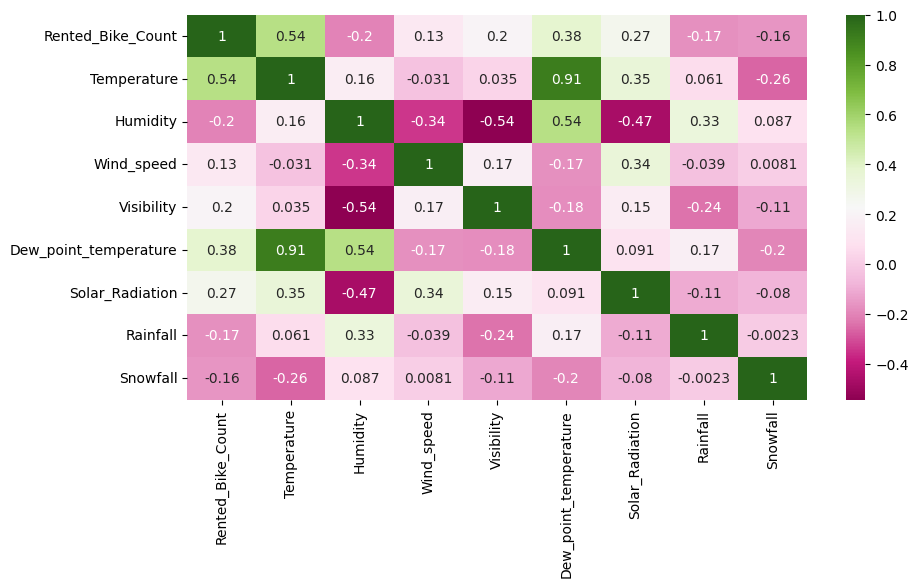

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(seoul_bike_df.corr(), cmap = 'PiYG', annot = True)

**We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are**:
* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are**:
* humidity
* rainfall

* **From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.**

In [ ]:
# drop the Dew point temperature column
seoul_bike_df = seoul_bike_df.drop(['Dew_point_temperature'], axis = 1)

In [ ]:
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  Month              8760 non-null   category
 13  Weekdays_Weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


#### **Pair Plot**

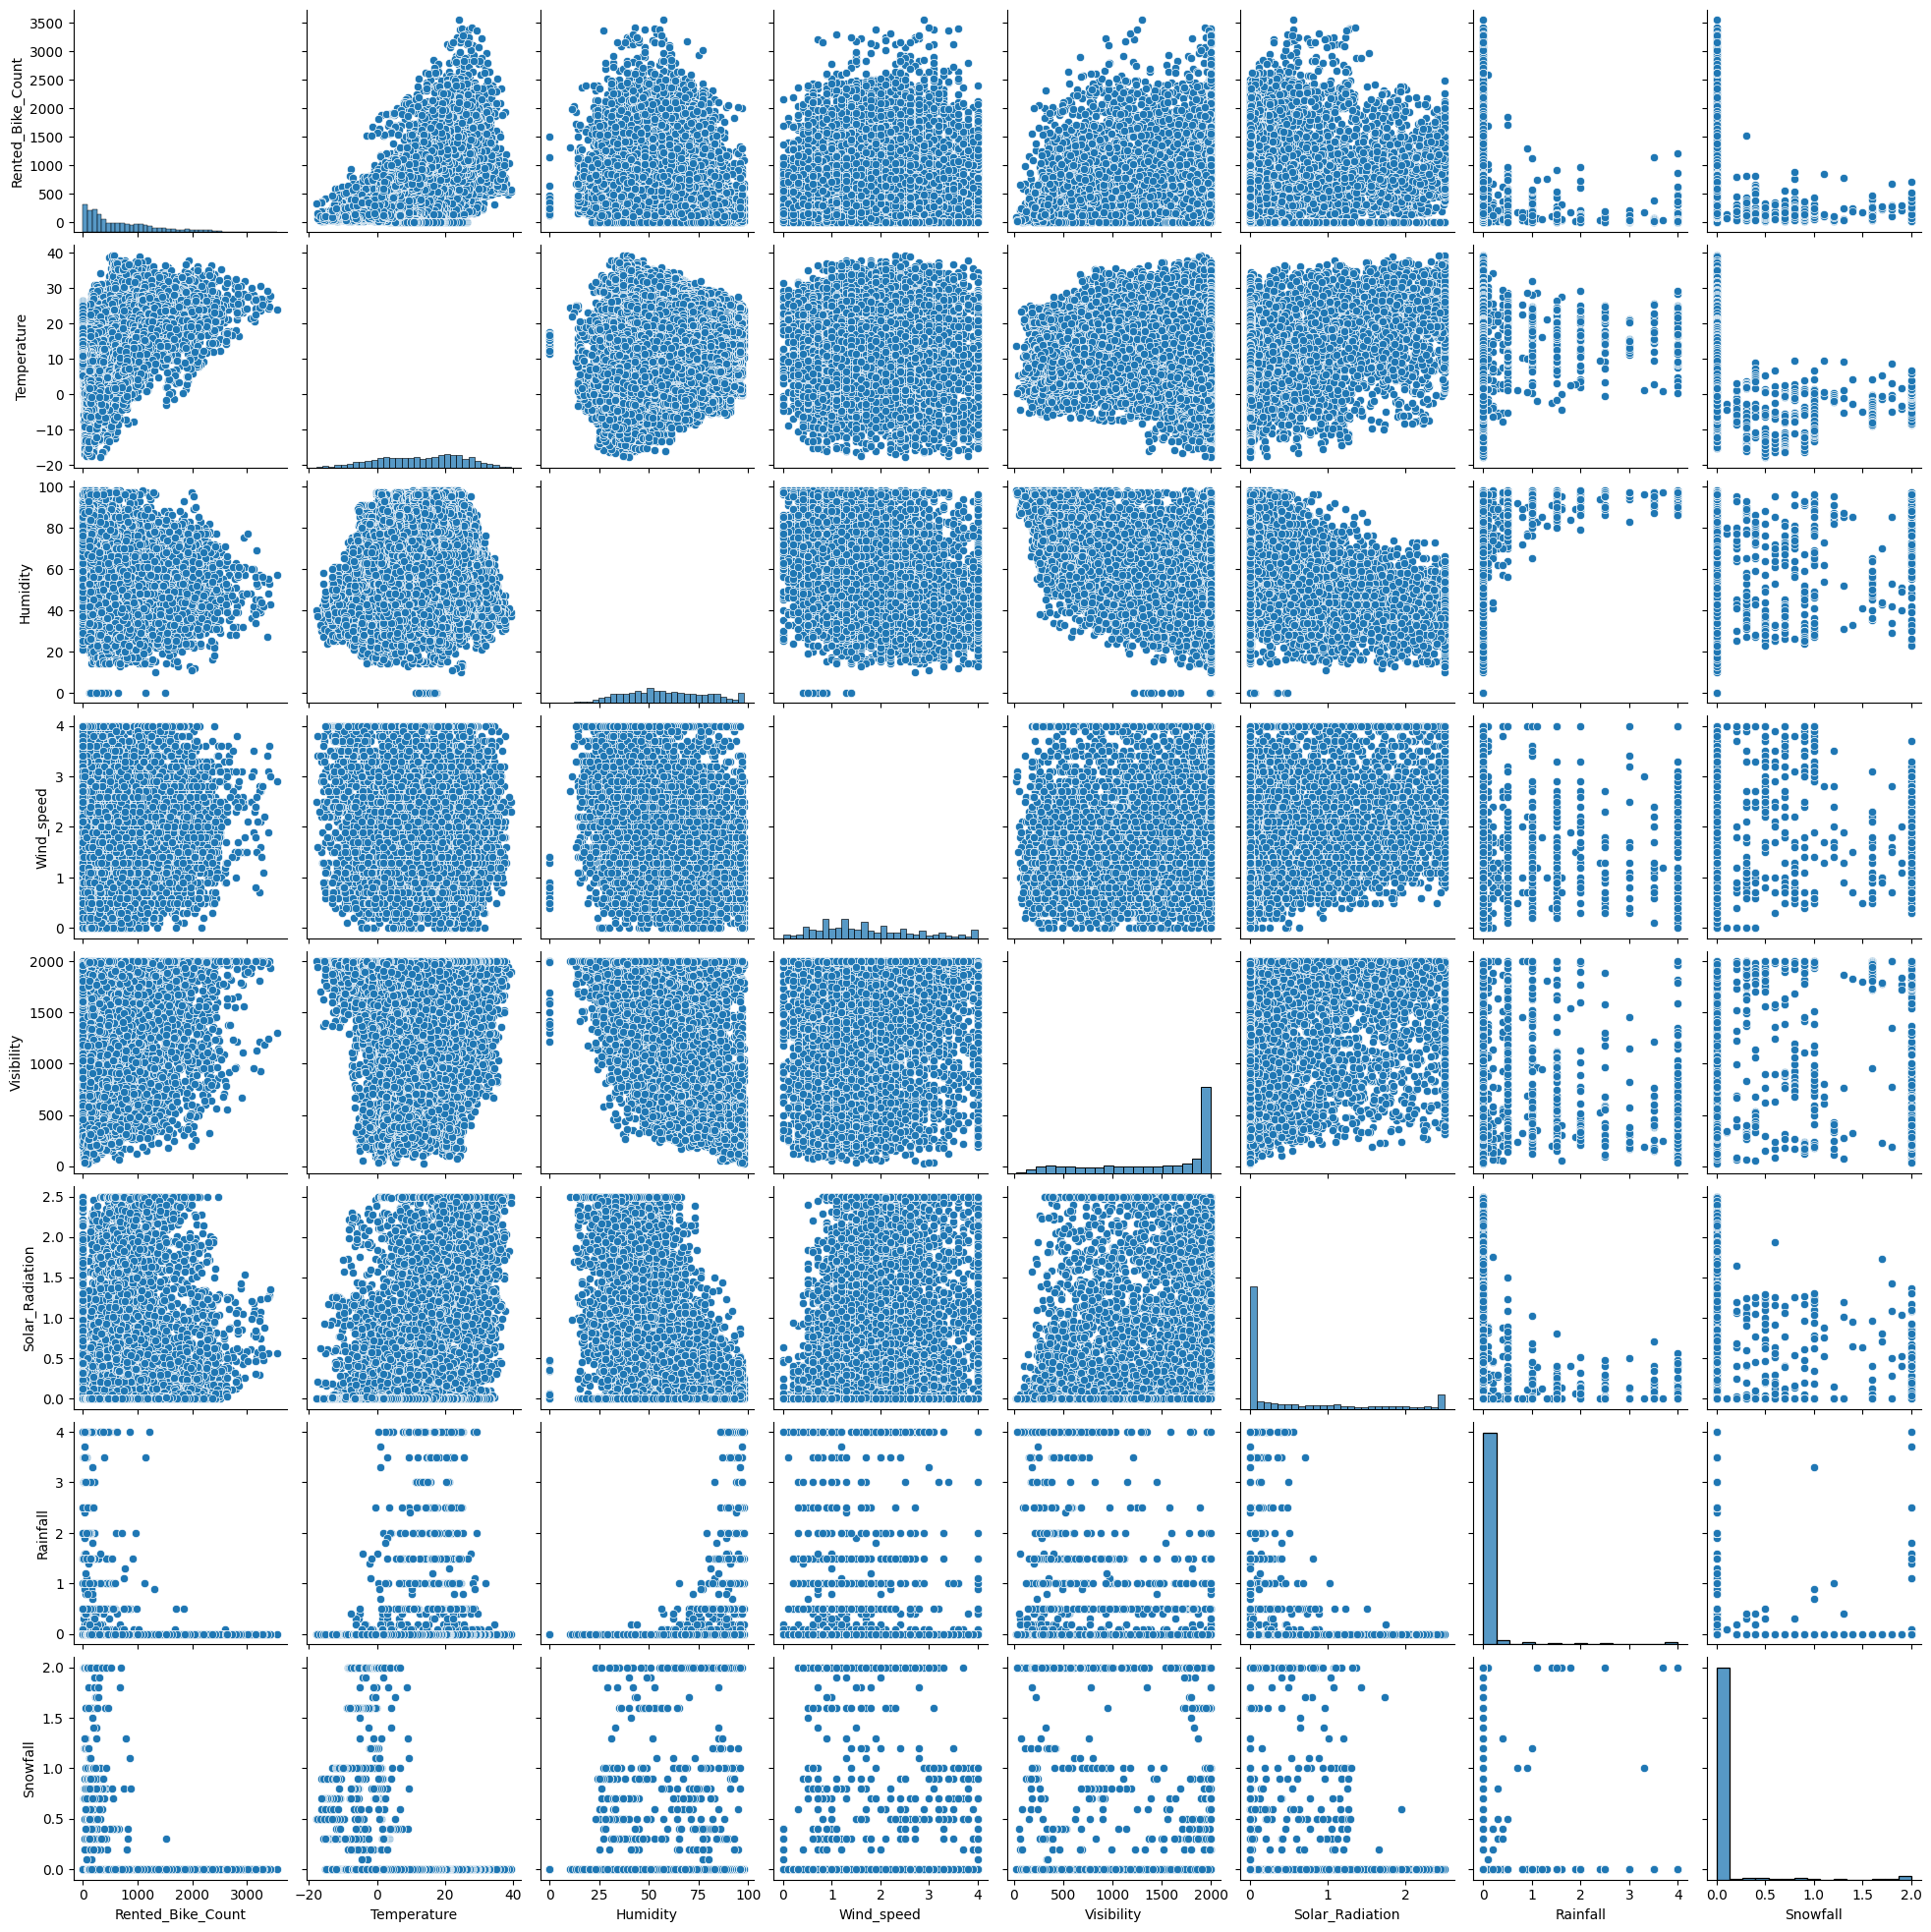

In [ ]:
sns.pairplot(seoul_bike_df, markers=['o', 's', 'D'])
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

#### **Perform One Hot Encoding**

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [ ]:
#Assign all categorical features to a variable
categorical_features = list(seoul_bike_df.select_dtypes(['object','category']).columns)
categorical_features = pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'Weekdays_Weekend'],
      dtype='object')

In [ ]:
#create a copy
encoded_bike_df = seoul_bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis = 1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    encoded_bike_df = one_hot_encoding(encoded_bike_df, col)
encoded_bike_df.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  Month_4  Month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  \
0        0        0        0        0         0         0         1   
1        0        0        0        0         0         0         1   
2        0        0        0        0         0         0         1   
3        0        0        0        0         0         0         1   
4        0        0        0        0         0         0         1   

   Weekdays_Weekend_1  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 48 columns]

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [ ]:
encoded_bike_df.columns.to_list()

['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_No Holiday',
 'Functioning_Day_Yes',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12',
 'Weekdays_Weekend_1']

## ***6. ML Model Implementation***

* A model defines the relationship between features and label.A feature is an input variable—the x variable in simple linear regression.A label is the thing we're predicting—the y variable in simple linear regression.Training means creating or learning the model.In order to build the predictive model, it's time to implement some of the model training on the above selected feature.

Following algorithms have been used for predictions:-

* **Linear Regression**
* **Lasso Regression**
* **Ridge Regression**
* **Decision Tree**
* **Random Forest Regression**

**Boosting**

Boosting is a method used in machine learning to reduce errors in predictive data analysis.Boosting improves machine models' predictive accuracy and performance by converting multiple weak learners into a single strong learning model. Machine learning models can be weak learners(have low prediction accuracy, similar to random guessing,prone to overfitting) or strong learners(higher prediction accuracy). Boosting converts a system of weak learners into a single strong learning system. There are many boosting algorithms which impart additional boost to model’s accuracy:

* **GradientBoostingRegressor** - aggregates the results of each decision tree along the way to calculate the final result
* **XGB Regressor** - provides parallel tree boosting,trees grow depth-wise
* **Light-BGM** - trees grow leaf-wise

#### **Splitting Data**

In [ ]:
X = encoded_bike_df.drop(columns = ['Rented_Bike_Count'], axis = 1)
y = np.sqrt(encoded_bike_df['Rented_Bike_Count'])

In [ ]:
X.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  Hour_1  Hour_2  Hour_3  ...  Month_4  Month_5  Month_6  Month_7  \
0       0.0       0       0       0  ...        0        0        0        0   
1       0.0       1       0       0  ...        0        0        0        0   
2       0.0       0       1       0  ...        0        0        0        0   
3       0.0       0       0       1  ...        0        0        0        0   
4       0.0       0       0       0  ...        0        0        0        0   

   Month_8  Month_9  Month_10  Month_11  Month_12  Weekdays_Weekend_1  
0        0        0         0         0         1                   0  
1        0        0         0         0         1                   0  
2        0        0         0         0         1                   0  
3        0        0         0         0         1                   0  
4        0        0         0         0         1                   0  

[5 rows x 47 columns]

In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

#### **Train_Test Split for Regression**

In [ ]:
# Create train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
encoded_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   int64  
 3   Wind_speed           8760 non-null   float64
 4   Visibility           8760 non-null   int64  
 5   Solar_Radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Hour_1               8760 non-null   uint8  
 9   Hour_2               8760 non-null   uint8  
 10  Hour_3               8760 non-null   uint8  
 11  Hour_4               8760 non-null   uint8  
 12  Hour_5               8760 non-null   uint8  
 13  Hour_6               8760 non-null   uint8  
 14  Hour_7               8760 non-null   uint8  
 15  Hour_8               8760 non-null   u

In [ ]:
encoded_bike_df.columns.to_list()

['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_No Holiday',
 'Functioning_Day_Yes',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12',
 'Weekdays_Weekend_1']

#### **Evaluation Metrics for Regression**

The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.


## **1 - LINEAR REGRESSION**

**Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line.**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)

lin_reg.score(X_train, y_train)

0.7929200473174423

In [ ]:
lin_reg.coef_

array([ 4.61865026e-01, -1.04485061e-01,  4.64915338e-03,  6.26860569e-04,
        8.84515600e-01, -5.00036340e+00, -1.81268865e-01, -2.03291036e+00,
       -5.01997483e+00, -7.19081129e+00, -9.68493546e+00, -9.41828307e+00,
       -4.56826648e+00,  1.61506632e+00,  7.09861988e+00,  1.40827063e+00,
       -2.93077883e+00, -3.04772144e+00, -1.96355886e+00, -2.12844334e+00,
       -2.16920516e+00, -1.19879463e+00,  5.85976980e-01,  4.65851648e+00,
        1.04103680e+01,  7.34324258e+00,  6.54592042e+00,  6.56254403e+00,
        5.31185809e+00,  1.70745362e+00, -1.91273306e+10,  1.52847532e+09,
       -3.62664798e+09,  3.30787488e+00,  2.92579979e+01, -5.29870280e-01,
        1.55006826e+10,  1.55006826e+10,  1.55006826e+10, -5.15512330e+09,
       -5.15512330e+09, -5.15512330e+09, -3.62664797e+09, -3.62664797e+09,
       -3.62664797e+09,  1.97925221e+00, -1.46962100e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [ ]:
# calculate MSE
from sklearn.metrics import mean_squared_error
MSE_lr = mean_squared_error((y_train), (y_pred_train))
print("MSE Score is: ", MSE_lr)

# calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print('RMSE: ', RMSE_lr)

# calculate MAE
MAE_lr = mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

# calculate r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)

# calculate adjusted r2
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE Score is:  32.35221728923445
RMSE:  5.687900956348876
MAE : 4.3228927657375325
R2 : 0.7929200473174423
Adjusted R2 : 0.7883762761801499


**Looks like our train set's r2 score value is 0.79 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 30.604548892579782
RMSE : 5.532137822992101
MAE : 4.219368177514577
R2 : 0.7977836087519528
Adjusted R2 : 0.793346554415511


**The test set's r2_score is 0.79. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

**Heteroscedasticity**

Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

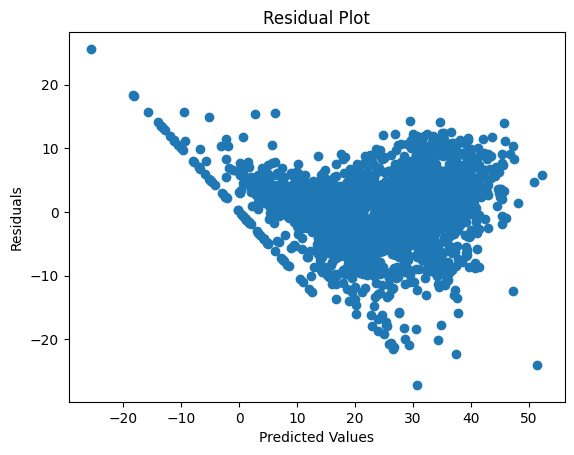

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

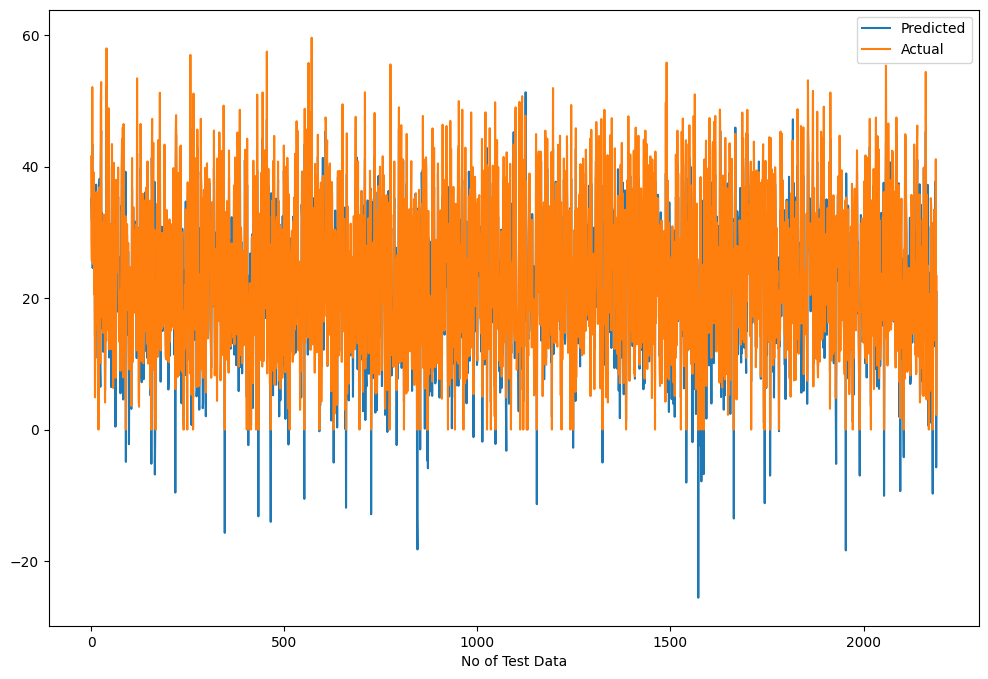

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(12,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **RIDGE and LASSO REGRESSION**

* Ridge and Lasso Regression are types of Regularization techniques.
* Regularization techniques are used to deal with overfitting and when the dataset is large.
* Ridge and Lasso Regression involve adding penalties to the regression function.


## **2 - LASSO REGRESSION**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fit the Lasso model
lasso.fit(X_train, y_train)

# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.41412335316198046 0.3843364609605735


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 96.18546041777365
RMSE : 9.807418641914582
MAE : 7.444194989820729
R2 : 0.3843364609605735
Adjusted R2 : 0.3708275037547598


**Looks like train set's r2 score value is 0.38 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 88.66981737984119
RMSE : 9.416465227453516
MAE : 7.168246222290489
R2 : 0.41412335316198046
Adjusted R2 : 0.40126798322669244


**The test set's r2_score is 0.41. This means our linear model is not performing well on the data.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

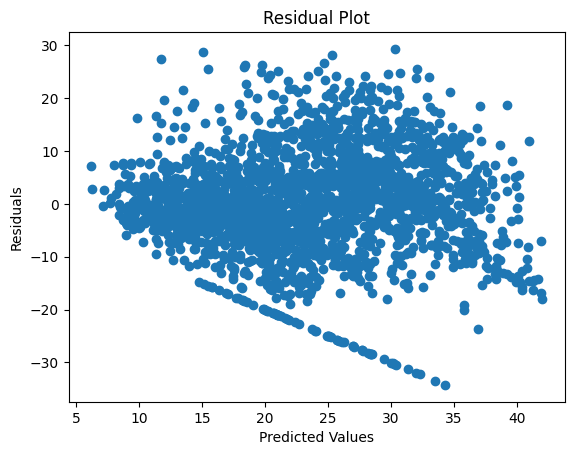

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

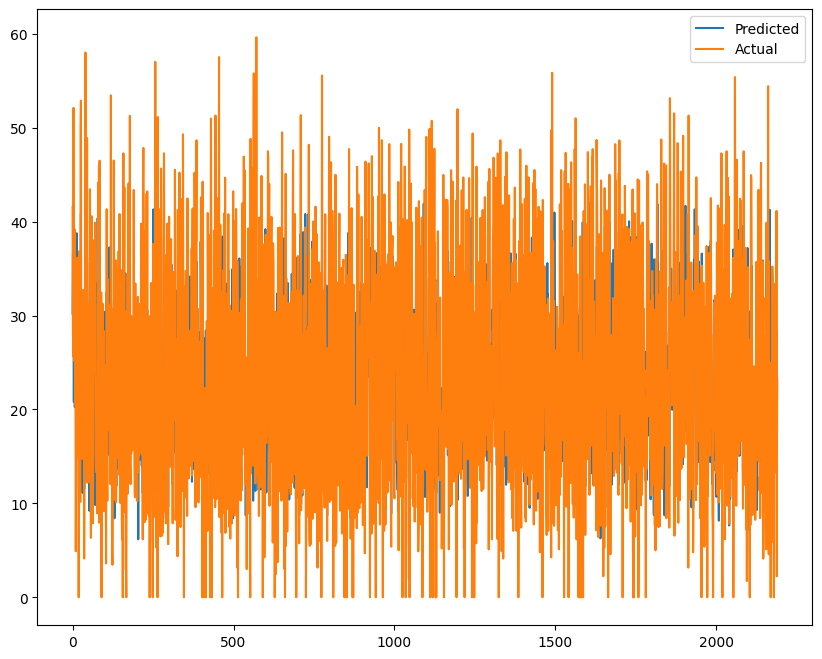

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

 ## **3 - RIDGE REGRESSION**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

# fit the model
ridge.fit(X_train,y_train)

#check the score
ridge.score(X_train, y_train)

#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
y_pred_train_ridge

array([29.149588  ,  8.23842988, 26.54431306, ..., 30.99028704,
       20.17512975, 34.66096801])

In [ ]:
y_pred_test_ridge

array([35.1244408 , 33.68642546, 31.68958403, ..., 33.6254573 ,
       -5.74757843, 20.92616752])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score

#calculate r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)

# Adjusted r2
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.352229372611184
RMSE : 5.687902018548771
MAE : 4.323015700723806
R2 : 0.7929199699742091
Adjusted R2 : 0.7883761971398431


**Looks like our train set's r2 score value is 0.79 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 30.60240596241806
RMSE : 5.531944139488219
MAE : 4.2193624732864246
R2 : 0.7977977679413438
Adjusted R2 : 0.7933610242873957


**The r2_score for the test set is 0.79. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

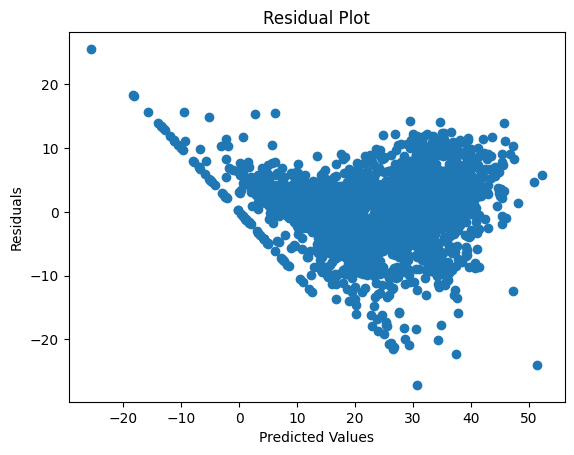

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

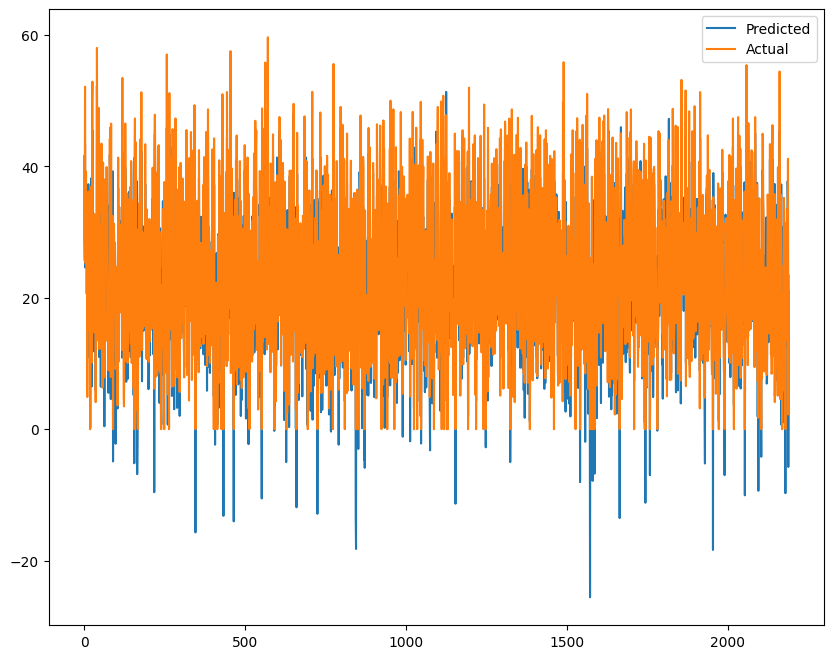

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

 ## **4 - DECISION TREE**

A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)


print(y_pred_train_d)
print(y_pred_test_d)

[34.46466109 10.51051379 23.0699208  ... 34.46466109 14.6239217
 28.25123837]
[34.46466109 34.46466109 34.46466109 ... 34.46466109 13.06437911
 20.14107599]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.7246121226463897
MSE : 43.02400271755269
RMSE : 6.559268459024428
MAE : 4.750905539886412
R2 : 0.7246121226463897
Adjusted R2 : 0.7185695314999754


**Looks like our train set's r2 score value is 0.66, that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 47.0982301200571
RMSE : 6.862815028838902
MAE : 4.946071768850801
R2 : 0.6888033160535434
Adjusted R2 : 0.6819750041275474


**The r2_score for the test set is 0.64. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

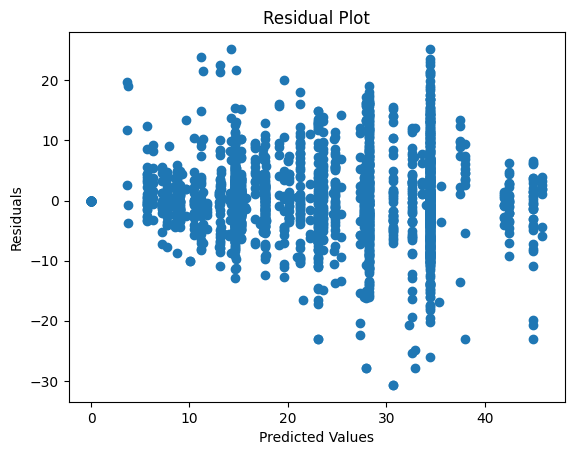

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

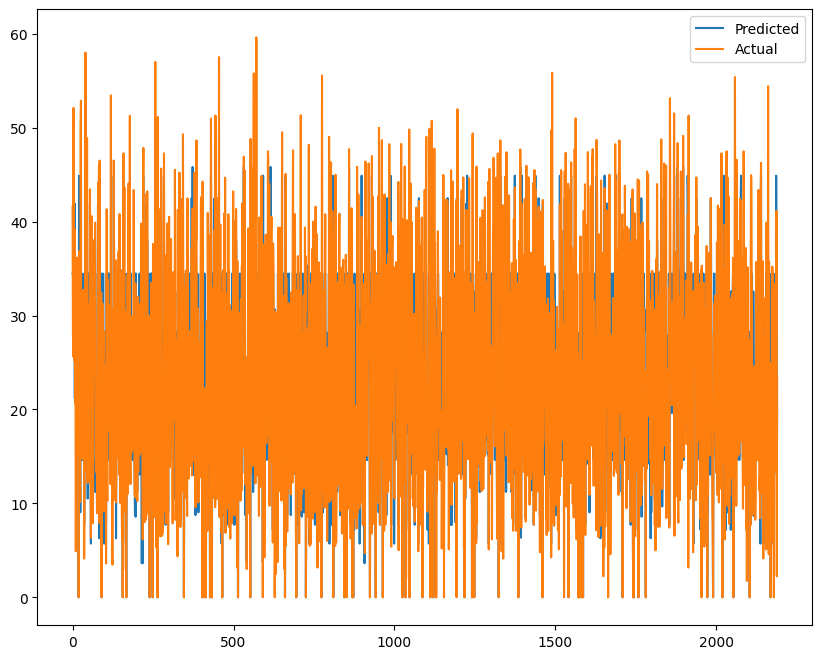

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

 ## **5 - RANDOM FOREST**

 For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.989129117332501
MSE : 1.698364103471824
RMSE : 1.3032129923661073
MAE : 0.8322998782042068
R2 : 0.989129117332501
Adjusted R2 : 0.9888905872272851


**Looks like our train set's r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 11.326380043006571
RMSE : 3.3654687701725257
MAE : 2.156098052244438
R2 : 0.9251621154018708
Adjusted R2 : 0.9235200142925748


**The r2_score for the test set is 0.92. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

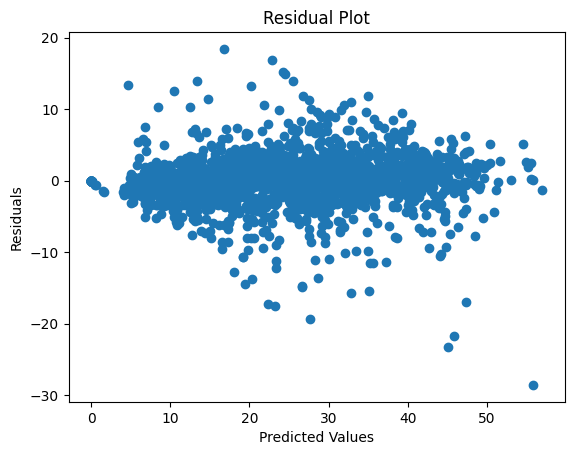

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
rf_model.feature_importances_

array([3.12807310e-01, 1.59302437e-01, 1.26654293e-02, 1.23901243e-02,
       2.38867178e-02, 2.80504872e-02, 1.27357464e-03, 4.21234639e-03,
       1.35756973e-02, 2.01752804e-02, 3.19661752e-02, 2.86474368e-02,
       1.10820850e-02, 4.12207055e-03, 1.54436331e-02, 1.10625482e-03,
       2.00940840e-03, 8.55877004e-04, 4.49799178e-04, 2.90843746e-04,
       4.41010890e-04, 1.17809803e-03, 3.79651840e-03, 1.08187919e-02,
       3.42509537e-02, 1.58827665e-02, 1.14002692e-02, 1.12001337e-02,
       7.67780754e-03, 3.52156135e-03, 3.71710475e-03, 9.24275502e-04,
       6.04591390e-03, 3.71296075e-03, 1.59450295e-01, 2.49431804e-04,
       3.20186298e-03, 1.15960664e-03, 1.23515077e-03, 3.30650736e-03,
       1.00089341e-03, 2.27203719e-03, 9.57948188e-04, 2.74448275e-03,
       5.61394301e-03, 7.27546995e-04, 1.91991401e-02])

### **Features Importance**

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.31
34  Functioning_Day_Yes                0.16
1              Humidity                0.16
10               Hour_4                0.03
24              Hour_18                0.03
5              Rainfall                0.03
11               Hour_5                0.03
25              Hour_19                0.02
14               Hour_8                0.02
46   Weekdays_Weekend_1                0.02
9                Hour_3                0.02
4       Solar_Radiation                0.02
44             Month_11                0.01
2            Wind_speed                0.01
32       Seasons_Winter                0.01
8                Hour_2                0.01
27              Hour_21                0.01
26              Hour_20                0.01
3            Visibility                0.01
28              Hour_22                0.01
23              Hour_17                0.01
12               Hour_6                0.01
13               Hour_7                0.00
45             Month_12                0.00
43             Month_10                0.00
42              Month_9                0.00
41              Month_8                0.00
40              Month_7                0.00
39              Month_6                0.00
38              Month_5                0.00
37              Month_4                0.00
36              Month_3                0.00
35              Month_2                0.00
20              Hour_14                0.00
21              Hour_15                0.00
7                Hour_1                0.00
31       Seasons_Summer                0.00
30       Seasons_Spring                0.00
29              Hour_23                0.00
15               Hour_9                0.00
16              Hour_10                0.00
17              Hour_11                0.00
18              Hour_12                0.00
19              Hour_13                0.00
6              Snowfall                0.00
22              Hour_16                0.00
33   Holiday_No Holiday                0.00

In [ ]:
# fit the model
rf_model.fit(X_train,y_train)

features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

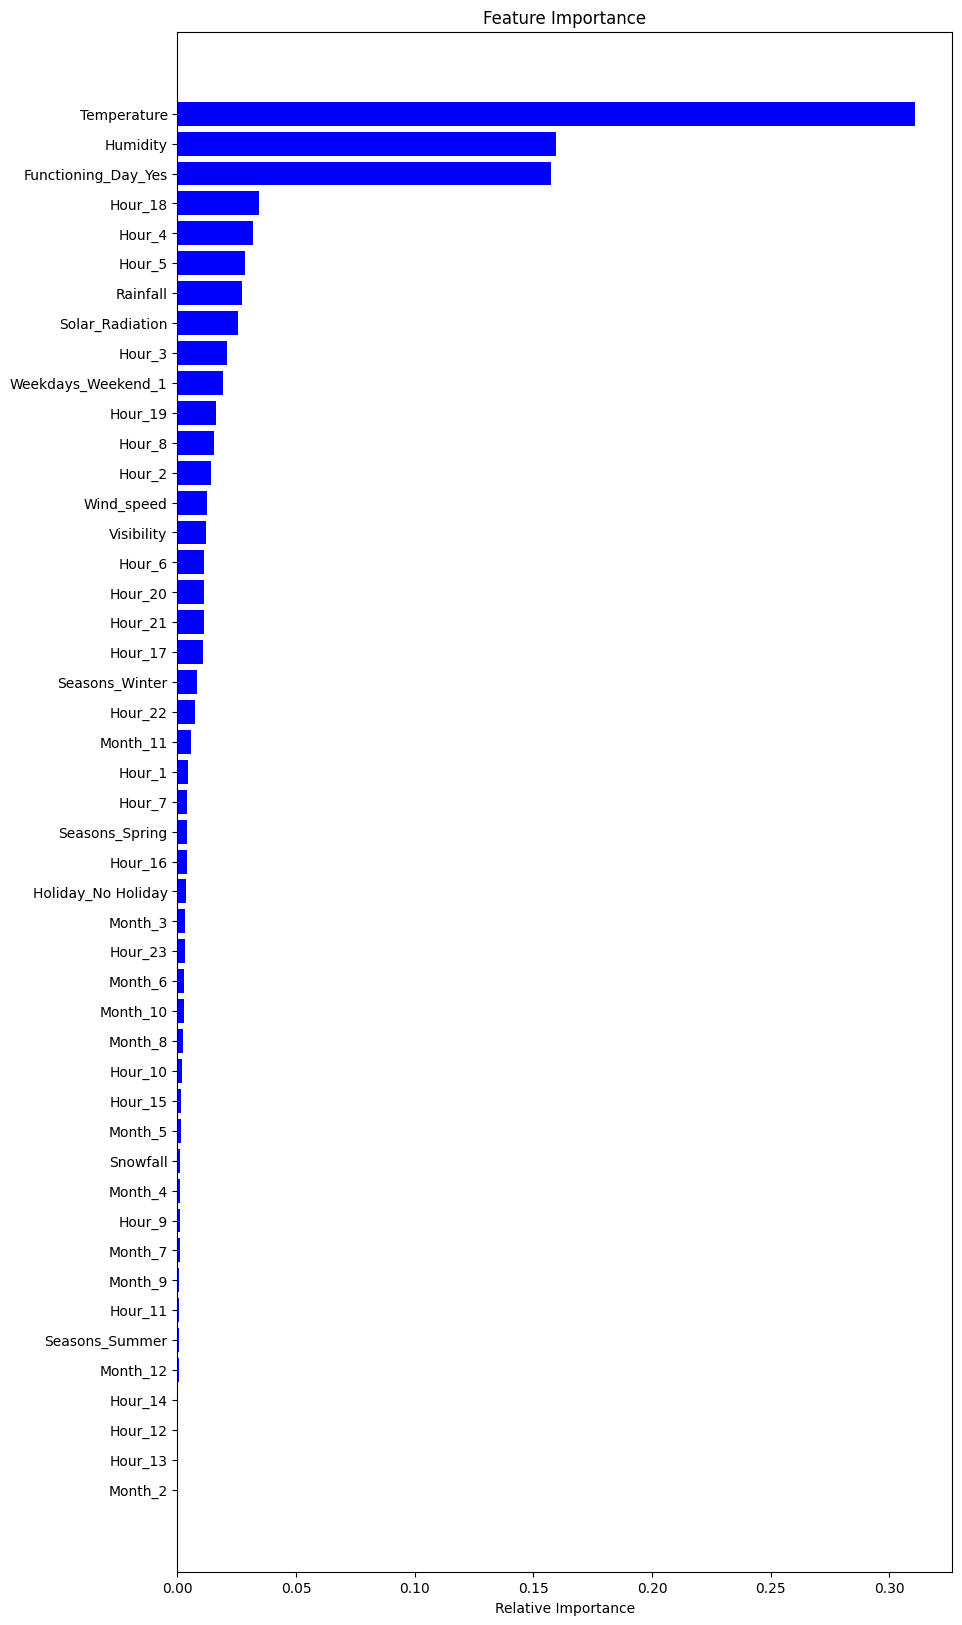

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **6 GRADIENT BOOSTING**

# Gradient boosting is a method standing out for its prediction speed and accuracy, particularly with large and complex datasets. From Kaggle competitions to machine learning solutions for business, this algorithm has produced the best results.

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8767418391269981
MSE : 19.256691686363585
RMSE : 4.3882447158702975
MAE : 3.324378453296332
R2 : 0.8767418391269981
Adjusted R2 : 0.8740372949808585


**Looks like our train set's r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 20.16072461962387
RMSE : 4.4900695562122275
MAE : 3.3656336155754585
R2 : 0.8667900973859985
Adjusted R2 : 0.8638671910261209


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

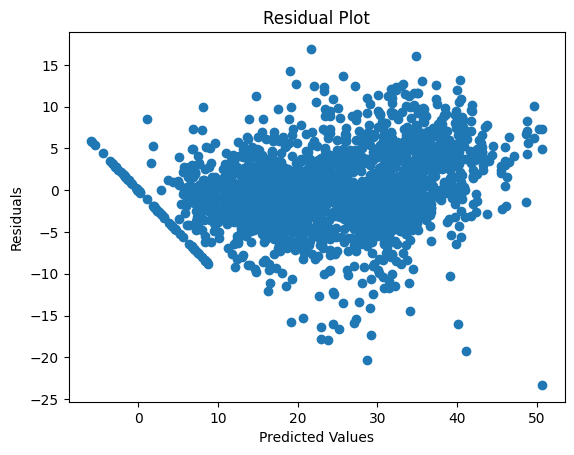

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
gb_model.feature_importances_

array([3.13145795e-01, 1.29191353e-01, 7.10041105e-04, 3.69371617e-04,
       4.74611987e-02, 5.59832244e-02, 0.00000000e+00, 0.00000000e+00,
       5.12355279e-03, 1.45411590e-02, 2.47373149e-02, 2.47519608e-02,
       6.40633270e-03, 8.04372486e-04, 9.28625764e-03, 0.00000000e+00,
       2.80241762e-03, 1.15757091e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.53557317e-04, 7.67581549e-03,
       3.18475873e-02, 1.62126362e-02, 1.23219136e-02, 1.53071753e-02,
       1.18693397e-02, 9.86059957e-04, 2.53744011e-05, 0.00000000e+00,
       4.14184998e-02, 1.77514393e-03, 1.83527416e-01, 0.00000000e+00,
       1.21057673e-03, 1.20459636e-04, 3.44578094e-04, 4.89697504e-03,
       4.50221060e-05, 2.27966818e-03, 0.00000000e+00, 7.41668290e-03,
       6.00851364e-03, 2.91777186e-04, 1.72933051e-02])

**Feature Importance**

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.31
34  Functioning_Day_Yes                0.18
1              Humidity                0.13
5              Rainfall                0.06
4       Solar_Radiation                0.05
32       Seasons_Winter                0.04
24              Hour_18                0.03
11               Hour_5                0.02
27              Hour_21                0.02
25              Hour_19                0.02
46   Weekdays_Weekend_1                0.02
10               Hour_4                0.02
9                Hour_3                0.01
44             Month_11                0.01
43             Month_10                0.01
12               Hour_6                0.01
28              Hour_22                0.01
26              Hour_20                0.01
8                Hour_2                0.01
23              Hour_17                0.01
14               Hour_8                0.01
20              Hour_14                0.00
2            Wind_speed                0.00
45             Month_12                0.00
13               Hour_7                0.00
42              Month_9                0.00
41              Month_8                0.00
40              Month_7                0.00
39              Month_6                0.00
38              Month_5                0.00
37              Month_4                0.00
36              Month_3                0.00
35              Month_2                0.00
33   Holiday_No Holiday                0.00
21              Hour_15                0.00
3            Visibility                0.00
31       Seasons_Summer                0.00
30       Seasons_Spring                0.00
15               Hour_9                0.00
16              Hour_10                0.00
6              Snowfall                0.00
17              Hour_11                0.00
7                Hour_1                0.00
18              Hour_12                0.00
19              Hour_13                0.00
22              Hour_16                0.00
29              Hour_23                0.00

Text(0.5, 0, 'Relative Importance')

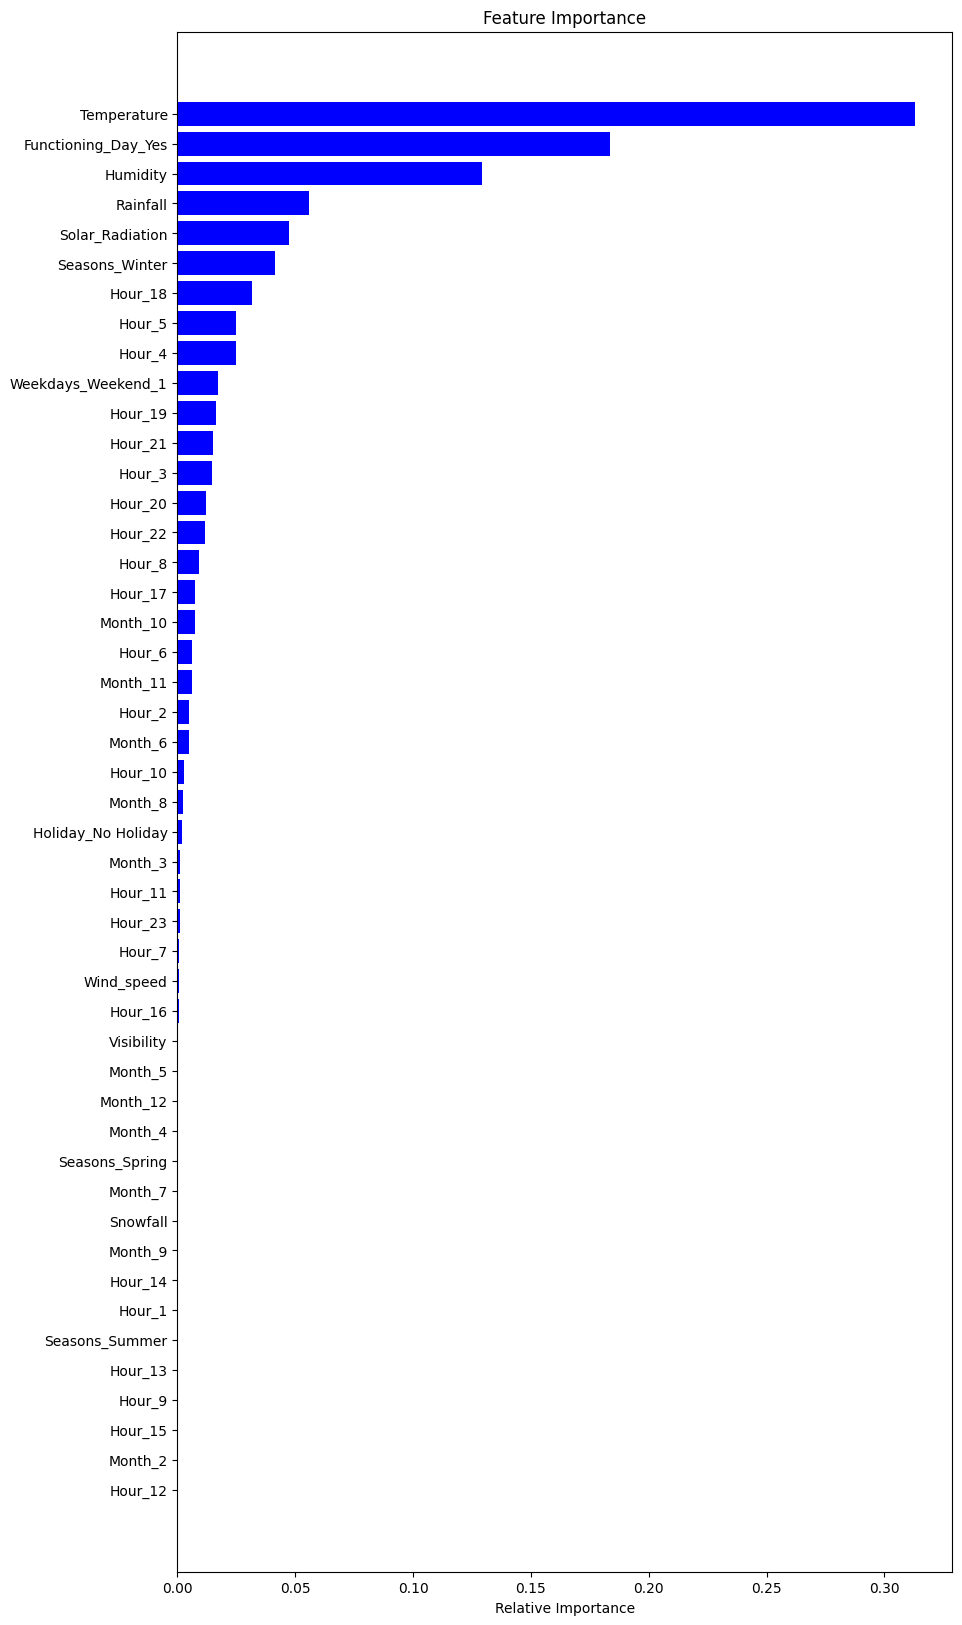

In [ ]:
gb_model.fit(X_train,y_train)

features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## **Hyperparmeter Tuning**

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

**Using GridSearchCV**

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

###**XG Boosting Regressor with GridSearchCV**

**Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
para_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

para_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

####**Importing XG Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

# Grid search
para_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

xgb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=para_dict,
                       cv=3, verbose=2, n_jobs=-1)

xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [ ]:
xgb_grid.best_estimator_

GradientBoostingRegressor(max_depth=5)

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_xgb = xgb_optimal_model.predict(X_train)
y_pred_xgb = xgb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:", xgb_optimal_model.score(X_train,y_train))
MSE_xgb = mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :",MSE_xgb)

RMSE_gbh=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_xgb)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9393224929721902
MSE : 9.479680995204799
RMSE : 3.0789090592618678
MAE : 2.233072442636765
R2 : 0.9393224929721902
Adjusted R2 : 0.9379911004276957


**Looks like our train set's r2 score value is 0.94 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XG Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_xgb)
print("MSE :",MSE_xgb)

RMSE_gbh=np.sqrt(MSE_xgb)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_xgb)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_xgb))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 9.479680995204799
RMSE : 3.0789090592618678
MAE : 2.5314471749015137
R2 : 0.9148724181180454
Adjusted R2 : 0.9130045393372556


**Hyperparameter tunning certainly showed a better result, r2 was 0.91 on test and MAE and RMSE was lowered. Overall model show good result.**

In [ ]:

# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'XG Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_xgb),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

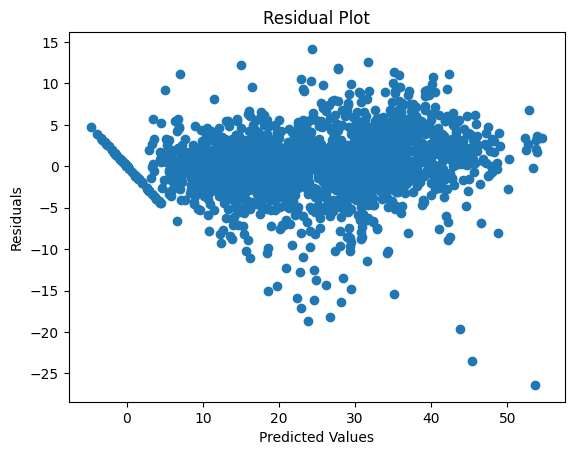

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_xgb),(y_test)-(y_pred_xgb))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.30
34  Functioning_Day_Yes                0.18
1              Humidity                0.16
5              Rainfall                0.04
10               Hour_4                0.03
32       Seasons_Winter                0.03
4       Solar_Radiation                0.03
24              Hour_18                0.03
11               Hour_5                0.03
25              Hour_19                0.02
46   Weekdays_Weekend_1                0.02
9                Hour_3                0.02
8                Hour_2                0.01
44             Month_11                0.01
43             Month_10                0.01
41              Month_8                0.01
12               Hour_6                0.01
28              Hour_22                0.01
27              Hour_21                0.01
26              Hour_20                0.01
23              Hour_17                0.01
14               Hour_8                0.01
21              Hour_15                0.00
22              Hour_16                0.00
45             Month_12                0.00
13               Hour_7                0.00
42              Month_9                0.00
15               Hour_9                0.00
40              Month_7                0.00
39              Month_6                0.00
38              Month_5                0.00
37              Month_4                0.00
36              Month_3                0.00
35              Month_2                0.00
2            Wind_speed                0.00
33   Holiday_No Holiday                0.00
3            Visibility                0.00
31       Seasons_Summer                0.00
30       Seasons_Spring                0.00
16              Hour_10                0.00
17              Hour_11                0.00
18              Hour_12                0.00
19              Hour_13                0.00
6              Snowfall                0.00
7                Hour_1                0.00
20              Hour_14                0.00
29              Hour_23                0.00

In [ ]:
xgb_model.fit(X_train,y_train)

features = X_train.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

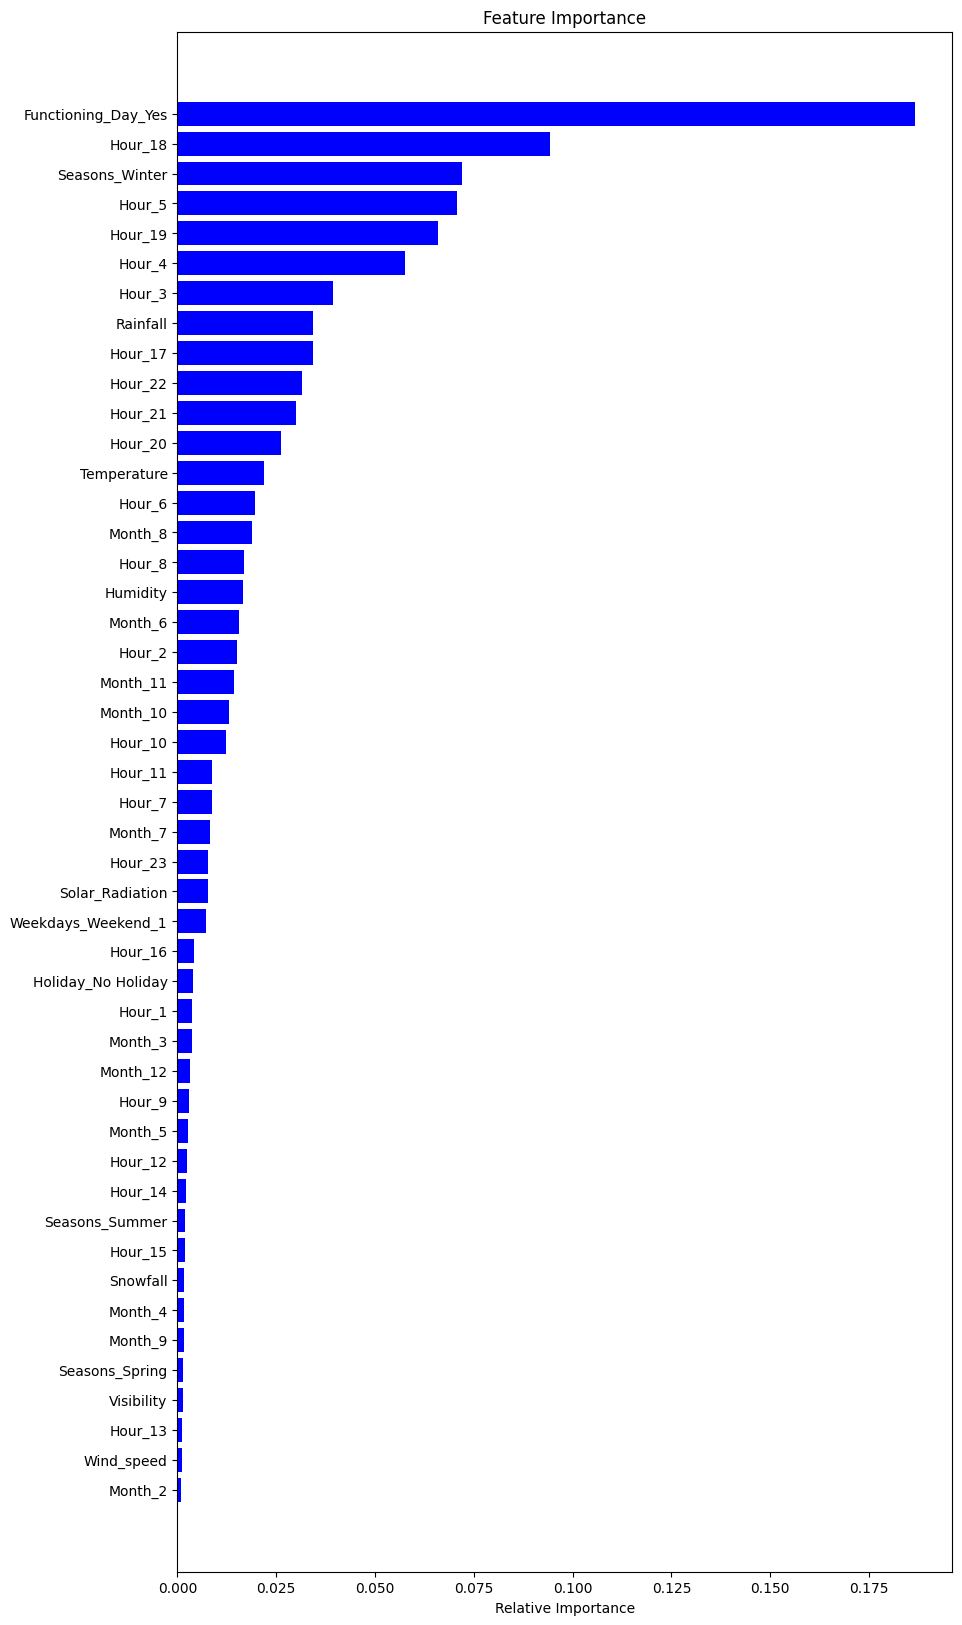

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.
Subsequently, we employed 7 machine learning algorithms including Linear Regression,Lasso , Ridge, Elastic Net, Decision Tree, Random Forest and Gradient Booster. We also performed hyperparameter tuning to enhance the performance of our models. The evaluation of our models resulted in the following findings :

In [ ]:
# displaying the results of evaluation metric values for all models
result = pd.concat([training_df, test_df], keys = ['Training set', 'Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0             Linear regression   4.323  32.352  5.688     0.793   
             1              Lasso regression   7.444  96.185  9.807     0.384   
             2              Ridge regression   4.323  32.352  5.688     0.793   
             3      Dicision tree regression   4.751  43.024  6.559     0.725   
             4      Random forest regression   0.832   1.698  1.303     0.989   
             5  Gradient boosting regression   3.324  19.257  4.388     0.877   
             6      XG Boosting gridsearchcv   2.233   9.480  3.079     0.939   
Test set     0             Linear regression   4.219  30.605  5.532     0.798   
             1              Lasso regression   7.168  88.670  9.416     0.414   
             2              Ridge regression   4.219  30.602  5.532     0.798   
             3      Dicision tree regression   4.946  47.098  6.863     0.689   
             4      Random forest regression   2.156  11.326  3.365     0.925   
             5  Gradient boosting regression   3.366  20.161  4.490     0.867   
             6      XG Boosting gridsearchcv   2.531   9.480  3.079     0.915   

                Adjusted R2  
Training set 0         0.79  
             1         0.37  
             2         0.79  
             3         0.72  
             4         0.99  
             5         0.87  
             6         0.94  
Test set     0         0.79  
             1         0.40  
             2         0.79  
             3         0.68  
             4         0.92  
             5         0.86  
             6         0.91

We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

* Gradient Boosting gridsearchcv model shows promising result with R2 score of 0.91, therefore it can be used to solve this problem.
* Temperatue, Functioning_Day_Yes, Humidity, Rainfall and  Solar radiation are major driving factors for the Bike rent demand.
* Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.
* People prefer to rent bike more in summer than in winter.
* Bike demand is more on clear days than on snowy or rainy days.
* Temperature range from 22 to 25(°C) has more demand for bike.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***